# 1. Import

## 1.1 Import Libraries

In [173]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import math
import warnings
plt.style.use('ggplot')

# Suppress all warnings
warnings.filterwarnings("ignore")

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

## 1.2 Import Data

In [174]:
# Read the CSV file
df = pd.read_csv( r"C:\Users\anama\OneDrive\Documentos\DM2425_ABCDEats_DATASET.csv")

In [175]:
df_backup=df

# 2. Explore the Data

In [176]:
df.shape

(31888, 56)

In [177]:
# Display the first few rows of the dataframe
df.head()

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   

   is_chain  first_order  last_order last_promo payment_method  CUI_American  \
0         1          0.0           1   DELIVERY           DIGI          0.00   
1         2          0.0           1   DISCOUNT           DIGI         12.82   
2         2          0.0           1   DISCOUNT           CASH          9.20   
3         1          0.0           2   DELIVERY           DIGI          0.00   
4         0          0.0           2          -           DIGI         14.57   

   CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  CUI_Chinese  \
0       0.00            0.0       0.0                 0.0          0.0   
1       6.39            0.0       0.0                 0.0          0.0   
2       0.00            0.0       0.0                 0.0          0.0   
3      13.70            0.0       0.0                 0.0          0.0   
4      40.87            0.0       0.0                 0.0          0.0   

   CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  CUI_Japanese  \
0           0.0          0.0       28.88          0.0           0.0   
1           0.0          0.0        0.00          0.0           0.0   
2           0.0          0.0        0.00          0.0           0.0   
3           0.0          0.0       17.86          0.0           0.0   
4           0.0          0.0        0.00          0.0           0.0   

   CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai  DOW_0  \
0                0.0        0.0                       0.0       0.0      1   
1                0.0        0.0                       0.0       0.0      1   
2                0.0        0.0                       0.0       0.0      1   
3                0.0        0.0                       0.0       0.0      0   
4                0.0        0.0                       0.0       0.0      0   

   DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_2  HR_3  HR_4  \
0      0      0      0      0      0      1   0.0     0     0     0     0   
1      0      0      0      0      0      1   0.0     0     0     0     0   
2      0      0      0      0      0      1   0.0     0     0     0     0   
3      1      0      0      0      0      1   0.0     0     0     0     0   
4      1      0      0      0      0      1   0.0     0     0     0     0   

   HR_5  HR_6  HR_7  HR_8  HR_9  HR_10  HR_11  HR_12  HR_13  HR_14  HR_15  \
0     0     0     0     0     0      0      0      0      0      0      0   
1     0     0     0     0     0      1      1      0      0      0      0   
2     0     0     0     0     1      0      1      0      0      0      0   
3     0     0     0     0     0      0      1      0      0      1      0   
4     0     0     0     1     1      0      0      0      0      0      0   

   HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0

In [178]:
#Check columns
df.columns.values

array(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order',
       'last_promo', 'payment_method', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'], dtype=object)

## Minor changes to the Data
1) Change the DOW columns names to the days of the week names
2) Create new variables - Time Periods
3) Define Age groups

In [179]:
df= df.rename(columns={'DOW_0':'Monday', 'DOW_1':'Tuesday', 'DOW_2':'Wednesday', 'DOW_3':'Thursday', 'DOW_4':'Friday', 'DOW_5':'Saturday',
       'DOW_6':'Sunday'})

In [180]:
df['early_morning(0h-5h)'] = df.filter(regex=r'^HR_[0-5]$').sum(axis=1).astype(int)

df['morning(6h-11h)'] = df.filter(regex=r'^HR_([6-9]|1[0-1])$').sum(axis=1).astype(int)

df['afternoon(12h-17h)']= df.filter(regex=r'^HR_1[2-7]$').sum(axis=1).astype(int)

df['night(18h-23h)'] = df.filter(regex=r'^HR_(1[8-9]|2[0-3])$').sum(axis=1).astype(int)


In [181]:
age_labels = ['Teenagers (15-19)', 'Young Adults (20-29)', 'Adults (30-49)', 'Middle-aged (50-64)', 'Seniors (65-80)']
df['age_group'] = pd.cut(df['customer_age'], bins=[15, 20, 30, 50, 65, 80], labels=age_labels, right=False)

## Data Analysis

### Data types:

- customer_age -> float? (change to int)
- first_order -> float? (change to int or date time (days) ??)
- last_order (chañge to date time (days) ?)
- HR_0 -> float? (change to int)

In [182]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               31888 non-null  object  
 1   customer_region           31888 non-null  object  
 2   customer_age              31161 non-null  float64 
 3   vendor_count              31888 non-null  int64   
 4   product_count             31888 non-null  int64   
 5   is_chain                  31888 non-null  int64   
 6   first_order               31782 non-null  float64 
 7   last_order                31888 non-null  int64   
 8   last_promo                31888 non-null  object  
 9   payment_method            31888 non-null  object  
 10  CUI_American              31888 non-null  float64 
 11  CUI_Asian                 31888 non-null  float64 
 12  CUI_Beverages             31888 non-null  float64 
 13  CUI_Cafe                  31888 non-null  floa

In [183]:
#Create a df only with the original variables (Drop the new columns created)
df_original = df.drop(columns=['early_morning(0h-5h)','morning(6h-11h)','afternoon(12h-17h)','night(18h-23h)','age_group'])

In [184]:
#Check only the original df
df_original.describe(include="all").T

count unique         top   freq       mean  \
customer_id                 31888  31875  742ca068fc      2        NaN   
customer_region             31888      9        8670   9761        NaN   
customer_age              31161.0    NaN         NaN    NaN  27.506499   
vendor_count              31888.0    NaN         NaN    NaN   3.102609   
product_count             31888.0    NaN         NaN    NaN   5.668245   
is_chain                  31888.0    NaN         NaN    NaN   2.818866   
first_order               31782.0    NaN         NaN    NaN  28.478604   
last_order                31888.0    NaN         NaN    NaN  63.675521   
last_promo                  31888      4           -  16748        NaN   
payment_method              31888      3        CARD  20161        NaN   
CUI_American              31888.0    NaN         NaN    NaN   4.880438   
CUI_Asian                 31888.0    NaN         NaN    NaN   9.960451   
CUI_Beverages             31888.0    NaN         NaN    NaN   2.300633   
CUI_Cafe                  31888.0    NaN         NaN    NaN   0.801163   
CUI_Chicken Dishes        31888.0    NaN         NaN    NaN   0.768096   
CUI_Chinese               31888.0    NaN         NaN    NaN   1.431218   
CUI_Desserts              31888.0    NaN         NaN    NaN   0.884359   
CUI_Healthy               31888.0    NaN         NaN    NaN   0.950203   
CUI_Indian                31888.0    NaN         NaN    NaN   1.631153   
CUI_Italian               31888.0    NaN         NaN    NaN   3.233411   
CUI_Japanese              31888.0    NaN         NaN    NaN   2.995379   
CUI_Noodle Dishes         31888.0    NaN         NaN    NaN   0.711676   
CUI_OTHER                 31888.0    NaN         NaN    NaN   2.999913   
CUI_Street Food / Snacks  31888.0    NaN         NaN    NaN   3.913253   
CUI_Thai                  31888.0    NaN         NaN    NaN   0.841697   
Monday                    31888.0    NaN         NaN    NaN   0.555914   
Tuesday                   31888.0    NaN         NaN    NaN   0.567486   
Wednesday                 31888.0    NaN         NaN    NaN   0.591006   
Thursday                  31888.0    NaN         NaN    NaN   0.619449   
Friday                    31888.0    NaN         NaN    NaN   0.677747   
Saturday                  31888.0    NaN         NaN    NaN   0.652973   
Sunday                    31888.0    NaN         NaN    NaN   0.704246   
HR_0                      30723.0    NaN         NaN    NaN        0.0   
HR_1                      31888.0    NaN         NaN    NaN   0.053845   
HR_2                      31888.0    NaN         NaN    NaN    0.06319   
HR_3                      31888.0    NaN         NaN    NaN   0.118759   
HR_4                      31888.0    NaN         NaN    NaN     0.1017   
HR_5                      31888.0    NaN         NaN    NaN   0.081943   
HR_6                      31888.0    NaN         NaN    NaN   0.069681   
HR_7                      31888.0    NaN         NaN    NaN     0.0768   
HR_8                      31888.0    NaN         NaN    NaN   0.131899   
HR_9                      31888.0    NaN         NaN    NaN   0.233912   
HR_10                     31888.0    NaN         NaN    NaN    0.32956   
HR_11                     31888.0    NaN         NaN    NaN   0.378167   
HR_12                     31888.0    NaN         NaN    NaN   0.314162   
HR_13                     31888.0    NaN         NaN    NaN   0.236453   
HR_14                     31888.0    NaN         NaN    NaN    0.21563   
HR_15                     31888.0    NaN         NaN    NaN   0.277032   
HR_16                     31888.0    NaN         NaN    NaN   0.356435   
HR_17                     31888.0    NaN         NaN    NaN   0.390962   
HR_18                     31888.0    NaN         NaN    NaN   0.336961   
HR_19                     31888.0    NaN         NaN    NaN    0.24561   
HR_20                     31888.0    NaN         NaN    NaN   0.142812   
HR_21                     31888.

In [185]:
#Drop the customer_id column? (irrelevant?)
df_without_id = df.drop(['customer_id'], axis=1)    

### Check for missing values:

In [186]:
df_original.isna().any()

customer_id                 False
customer_region             False
customer_age                 True
vendor_count                False
product_count               False
is_chain                    False
first_order                  True
last_order                  False
last_promo                  False
payment_method              False
CUI_American                False
CUI_Asian                   False
CUI_Beverages               False
CUI_Cafe                    False
CUI_Chicken Dishes          False
CUI_Chinese                 False
CUI_Desserts                False
CUI_Healthy                 False
CUI_Indian                  False
CUI_Italian                 False
CUI_Japanese                False
CUI_Noodle Dishes           False
CUI_OTHER                   False
CUI_Street Food / Snacks    False
CUI_Thai                    False
Monday                      False
Tuesday                     False
Wednesday                   False
Thursday                    False
Friday        

In [187]:
df_original.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
Monday                         0
Tuesday                        0
Wednesday                      0
Thursday                       0
Friday                         0
Saturday  

In [188]:
#Check the % of the missing values:
missing_percentage = df_original.isnull().mean() * 100

print("Percentage of Missing Values:")
print(missing_percentage)

Percentage of Missing Values:
customer_id                 0.000000
customer_region             0.000000
customer_age                2.279854
vendor_count                0.000000
product_count               0.000000
is_chain                    0.000000
first_order                 0.332413
last_order                  0.000000
last_promo                  0.000000
payment_method              0.000000
CUI_American                0.000000
CUI_Asian                   0.000000
CUI_Beverages               0.000000
CUI_Cafe                    0.000000
CUI_Chicken Dishes          0.000000
CUI_Chinese                 0.000000
CUI_Desserts                0.000000
CUI_Healthy                 0.000000
CUI_Indian                  0.000000
CUI_Italian                 0.000000
CUI_Japanese                0.000000
CUI_Noodle Dishes           0.000000
CUI_OTHER                   0.000000
CUI_Street Food / Snacks    0.000000
CUI_Thai                    0.000000
Monday                      0.000000
Tuesday 

###
Missing Values : HR_0

In [189]:
#Check when HR_0 = NaN, which is the variable with most missing values
nan_HR_0 = df_original[df_original['HR_0'].isna()]
pd.set_option('display.max_columns', None)
nan_HR_0

customer_id customer_region  customer_age  vendor_count  product_count  \
34     ae38da6386            8670          21.0             2              3   
87     a21a839c77            4140          19.0             1              4   
121    9237d23413            8670          22.0             3              4   
132    8c6ffd7357            4660          25.0             3              4   
186    67c6c9f9c4            4660          24.0             1              3   
...           ...             ...           ...           ...            ...   
31298  37b72b449d            2360          23.0             1              4   
31549  ac382ddfd1               -          28.0             1              2   
31615  96f1fc25e3            8670          25.0             2              2   
31781  d7c7face7e            2440          26.0             1              1   
31819  6624e03cdd            8670          28.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  \
34            1          0.0           7   DELIVERY           DIGI   
87            4          0.0          21          -           CARD   
121           2          0.0          27          -           CARD   
132           1          0.0          28          -           CARD   
186           0          0.0          36    FREEBIE           DIGI   
...         ...          ...         ...        ...            ...   
31298         0         85.0          85   DELIVERY           DIGI   
31549         2         87.0          89   DELIVERY           CARD   
31615         1         88.0          88   DELIVERY           CASH   
31781         1         90.0          90   DELIVERY           CASH   
31819         0          NaN           0   DELIVERY           CARD   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
34             0.00      23.70            0.0       0.0                 0.0   
87             0.00       0.00            0.0       0.0                 0.0   
121            5.77      17.76            5.9       0.0                 0.0   
132           27.54       0.00            0.0       0.0                 0.0   
186            0.00       0.00            0.0       0.0                 0.0   
...             ...        ...            ...       ...                 ...   
31298          0.00      24.08            0.0       0.0                 0.0   
31549          0.00      17.87            0.0       0.0                 0.0   
31615          0.00      17.98            0.0       0.0                 0.0   
31781          2.61       0.00            0.0       0.0                 0.0   
31819         23.83       0.00            0.0       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
34           12.08           0.0          0.0         0.0         0.00   
87            0.00           0.0          0.0         0.0         0.00   
121           0.00           0.0          0.0         0.0         0.00   
132           0.00           0.0          0.0         0.0         6.10   
186           0.00           0.0          0.0         0.0         6.14   
...            ...           ...          ...         ...          ...   
31298         0.00           0.0          0.0         0.0         0.00   
31549         0.00           0.0          0.0         0.0         0.00   
31615         0.00           0.0          0.0         0.0         0.00   
31781         0.00           0.0          0.0         0.0         0.00   
31819         0.00           0.0          0.0         0.0         0.00   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
34              0.0                0.0        0.0                      0.00   
87              0.0                0.0        0.0                     22.09   
121             0.0                0.0        0.0                      0.00   
132             0.0                0.0        0.0 

In [190]:
dow_columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hr_columns = [col for col in df.columns if col.startswith('HR_')]

In [191]:
#To replace the NaN's of HR_0, let's compare the sum of orders of the DOW with the sum of orders of the HR:
#If it's the same, then HR_0 should be 0, if not, it's the difference between the 2 values

row_sum_dow = df[dow_columns].sum(axis=1)
row_sum_hr = df[hr_columns].sum(axis=1)

row_difference = row_sum_dow - row_sum_hr

df.loc[df['HR_0'].isna(), 'HR_0'] = row_difference

df['HR_0'].head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HR_0, dtype: float64

In [192]:
df['HR_0'].isna().sum()

0

###
Missing Values : first_order

In [193]:
#Check when first_order = NaN
nan_first_order = df_original[df_original['first_order'].isna()]
nan_first_order

customer_id customer_region  customer_age  vendor_count  product_count  \
31782  0366fbb035            8670          24.0             1              1   
31783  039d7c8a20            4660          23.0             1              1   
31784  04c9d25c93            8670          27.0             1              1   
31785  09118ae9e7            8670          36.0             1              1   
31786  0d1f298bbd            4660          22.0             1              1   
...           ...             ...           ...           ...            ...   
31883  f4e366c281            8670          30.0             1              1   
31884  f6b6709018            8670           NaN             1              1   
31885  f74ad8ce3f            8670          24.0             1              1   
31886  f7b19c0241            8670          34.0             1              1   
31887  fd40d3b0e0            4660          30.0             1              1   

       is_chain  first_order  last_order last_promo payment_method  \
31782         0          NaN           0          -           DIGI   
31783         0          NaN           0   DELIVERY           DIGI   
31784         1          NaN           0   DISCOUNT           CASH   
31785         0          NaN           0          -           CARD   
31786         1          NaN           0   DISCOUNT           CASH   
...         ...          ...         ...        ...            ...   
31883         1          NaN           0    FREEBIE           DIGI   
31884         0          NaN           0   DELIVERY           DIGI   
31885         1          NaN           0          -           DIGI   
31886         0          NaN           0   DISCOUNT           DIGI   
31887         0          NaN           0          -           CASH   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
31782          0.00      11.87           0.00       0.0                 0.0   
31783          0.00       0.00           0.00       0.0                 0.0   
31784         18.16       0.00           0.00       0.0                 0.0   
31785          0.00       6.02           0.00       0.0                 0.0   
31786          5.22       0.00           0.00       0.0                 0.0   
...             ...        ...            ...       ...                 ...   
31883          0.00       0.00          18.04       0.0                 0.0   
31884         18.04       0.00           0.00       0.0                 0.0   
31885          0.00       0.00           0.00       0.0                 0.0   
31886          0.00      12.03           0.00       0.0                 0.0   
31887          0.00       0.00           0.00       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
31782          0.0          0.00          0.0        0.00         0.00   
31783          0.0          0.00          0.0       14.49         0.00   
31784          0.0          0.00          0.0        0.00         0.00   
31785          0.0          0.00          0.0        0.00         0.00   
31786          0.0          0.00          0.0        0.00         0.00   
...            ...           ...          ...         ...          ...   
31883          0.0          0.00          0.0        0.00         0.00   
31884          0.0          0.00          0.0        0.00         0.00   
31885          0.0         17.79          0.0        0.00         0.00   
31886          0.0          0.00          0.0        0.00         0.00   
31887          0.0          0.00          0.0        0.00         7.91   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
31782           0.0                0.0        0.0                       0.0   
31783           0.0                0.0        0.0                       0.0   
31784           0.0                0.0        0.0                       0.0   
31785           0.0                0.0        0.0 

###
Conclusion : When the first_order is a missing value, the last_order = 0
This is because who never order, will not have a last order, but if the first order is replaced with 0, then it will mean that there was a order 
in the last 24h, which is not True

In [194]:
df_original[df_original['first_order'].isna() & (df_original['last_order'] == 0)]

customer_id customer_region  customer_age  vendor_count  product_count  \
31782  0366fbb035            8670          24.0             1              1   
31783  039d7c8a20            4660          23.0             1              1   
31784  04c9d25c93            8670          27.0             1              1   
31785  09118ae9e7            8670          36.0             1              1   
31786  0d1f298bbd            4660          22.0             1              1   
...           ...             ...           ...           ...            ...   
31883  f4e366c281            8670          30.0             1              1   
31884  f6b6709018            8670           NaN             1              1   
31885  f74ad8ce3f            8670          24.0             1              1   
31886  f7b19c0241            8670          34.0             1              1   
31887  fd40d3b0e0            4660          30.0             1              1   

       is_chain  first_order  last_order last_promo payment_method  \
31782         0          NaN           0          -           DIGI   
31783         0          NaN           0   DELIVERY           DIGI   
31784         1          NaN           0   DISCOUNT           CASH   
31785         0          NaN           0          -           CARD   
31786         1          NaN           0   DISCOUNT           CASH   
...         ...          ...         ...        ...            ...   
31883         1          NaN           0    FREEBIE           DIGI   
31884         0          NaN           0   DELIVERY           DIGI   
31885         1          NaN           0          -           DIGI   
31886         0          NaN           0   DISCOUNT           DIGI   
31887         0          NaN           0          -           CASH   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
31782          0.00      11.87           0.00       0.0                 0.0   
31783          0.00       0.00           0.00       0.0                 0.0   
31784         18.16       0.00           0.00       0.0                 0.0   
31785          0.00       6.02           0.00       0.0                 0.0   
31786          5.22       0.00           0.00       0.0                 0.0   
...             ...        ...            ...       ...                 ...   
31883          0.00       0.00          18.04       0.0                 0.0   
31884         18.04       0.00           0.00       0.0                 0.0   
31885          0.00       0.00           0.00       0.0                 0.0   
31886          0.00      12.03           0.00       0.0                 0.0   
31887          0.00       0.00           0.00       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
31782          0.0          0.00          0.0        0.00         0.00   
31783          0.0          0.00          0.0       14.49         0.00   
31784          0.0          0.00          0.0        0.00         0.00   
31785          0.0          0.00          0.0        0.00         0.00   
31786          0.0          0.00          0.0        0.00         0.00   
...            ...           ...          ...         ...          ...   
31883          0.0          0.00          0.0        0.00         0.00   
31884          0.0          0.00          0.0        0.00         0.00   
31885          0.0         17.79          0.0        0.00         0.00   
31886          0.0          0.00          0.0        0.00         0.00   
31887          0.0          0.00          0.0        0.00         7.91   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
31782           0.0                0.0        0.0                       0.0   
31783           0.0                0.0        0.0                       0.0   
31784           0.0                0.0        0.0                       0.0   
31785           0.0                0.0        0.0 

###
Missing Values : customer_age

In [195]:
#Check when customer_age = NaN
nan_customer_age = df_original[df_original['customer_age'].isna()]
nan_customer_age

customer_id customer_region  customer_age  vendor_count  product_count  \
3      180c632ed8            4660           NaN             2              3   
27     8e8652bdc8            4660           NaN             2              3   
37     6137fa5620            8670           NaN             2              2   
69     2a90e9da84            4660           NaN             2              2   
73     a67d3108cb            8670           NaN             2              2   
...           ...             ...           ...           ...            ...   
31488  46aa9dfeb0            8670           NaN             1              2   
31572  29207a92c8            2360           NaN             1              1   
31762  d7bf721199            2360           NaN             1              1   
31877  ee49f4eb0a            2440           NaN             1              1   
31884  f6b6709018            8670           NaN             1              1   

       is_chain  first_order  last_order last_promo payment_method  \
3             1          0.0           2   DELIVERY           DIGI   
27            2          0.0           6   DISCOUNT           DIGI   
37            2          0.0           8   DISCOUNT           CARD   
69            1          0.0          17          -           CARD   
73            1          0.0          17          -           CARD   
...         ...          ...         ...        ...            ...   
31488         0         87.0          87   DELIVERY           DIGI   
31572         1         88.0          88          -           CASH   
31762         1         89.0          89          -           DIGI   
31877         1          NaN           0   DELIVERY           CARD   
31884         0          NaN           0   DELIVERY           DIGI   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
3              0.00      13.70           0.00       0.0                 0.0   
27             0.00       0.00           0.00       0.0                 0.0   
37             6.13       0.00           0.00       0.0                 0.0   
69            15.99       0.00           0.00       0.0                 0.0   
73             0.00      25.85           0.00       0.0                 0.0   
...             ...        ...            ...       ...                 ...   
31488          0.00       0.00           0.00       0.0                 0.0   
31572          0.00       0.00           3.88       0.0                 0.0   
31762          0.00       0.00           0.00       0.0                 0.0   
31877          0.00       0.00           0.00       0.0                 0.0   
31884         18.04       0.00           0.00       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
3              0.0          0.00          0.0       17.86         0.00   
27             0.0          0.00          0.0       34.88         0.00   
37             0.0          0.00          0.0        0.00         0.00   
69             0.0          0.00          0.0        0.00         1.54   
73             0.0          0.00          0.0        0.00         0.00   
...            ...           ...          ...         ...          ...   
31488          0.0          0.00          0.0        0.00         0.00   
31572          0.0          0.00          0.0        0.00         0.00   
31762          0.0          3.74          0.0        0.00         0.00   
31877          0.0          0.00          0.0        0.00         0.00   
31884          0.0          0.00          0.0        0.00         0.00   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
3               0.0                0.0       0.00                      0.00   
27              0.0                0.0       0.00                      0.00   
37              0.0                0.0       0.00                     13.15   
69              0.0                0.0       0.00 

### Check for Duplicates:

In [196]:
df_original.duplicated().sum()

13

In [197]:
df_original.loc[df.duplicated(keep=False)]

customer_id customer_region  customer_age  vendor_count  product_count  \
3355   b55012ee1c            8550          23.0             4             11   
3379   b55012ee1c            8550          23.0             4             11   
7867   24251eb7da            8550          28.0             4              8   
7887   24251eb7da            8550          28.0             4              8   
16227  671bf0c738            8550          25.0             4              7   
16230  671bf0c738            8550          25.0             4              7   
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   
24328  df91183978            8550          23.0             2              3   
24329  df91183978            8550          23.0             2              3   
24822  6bbf5f74cd            8550          22.0            10             20   
24827  6bbf5f74cd            8550          22.0            10             20   
25792  8aa9bbc147            8550          24.0             2              4   
25793  8aa9bbc147            8550          24.0             2              4   
27514  cf563a0a98            8550          27.0             2              2   
27515  cf563a0a98            8550          27.0             2              2   
27653  201a13a34d            8550          28.0             2              2   
27739  201a13a34d            8550          28.0             2              2   
28706  06018a56be            8550          27.0             2              2   
28713  06018a56be            8550          27.0             2              2   
29922  fac7984c0d            8550          29.0             1              1   
29926  fac7984c0d            8550          29.0             1              1   
30402  b8e7a643a4            8550          18.0             2              4   
30416  b8e7a643a4            8550          18.0             2              4   
31639  cc08ef25ce            8550          31.0             1              2   
31653  cc08ef25ce            8550          31.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  \
3355          1          2.0          89    FREEBIE           CARD   
3379          1          2.0          89    FREEBIE           CARD   
7867          3          7.0          85          -           CARD   
7887          3          7.0          85          -           CARD   
16227         3         23.0          66    FREEBIE           CARD   
16230         3         23.0          66    FREEBIE           CARD   
20855         0         35.0          35          -           CARD   
20907         0         35.0          35          -           CARD   
24328         1         47.0          52   DELIVERY           CARD   
24329         1         47.0          52   DELIVERY           CARD   
24822         9         48.0          88          -           CARD   
24827         9         48.0          88          -           CARD   
25792         2         53.0          59   DELIVERY           DIGI   
25793         2         53.0          59   DELIVERY           DIGI   
27514         0         61.0          62    FREEBIE           CASH   
27515         0         61.0          62    FREEBIE           CASH   
27653         1         62.0          62   DELIVERY           CARD   
27739         1         62.0          62   DELIVERY           CARD   
28706         0         67.0          89    FREEBIE           DIGI   
28713         0         67.0          89    FREEBIE           DIGI   
29922         0         75.0          75   DELIVERY           CARD   
29926         0         75.0          75   DELIVERY           CARD   
30402         0         78.0          78    FREEBIE           CASH   
30416         0         78.0          78    FREEBIE           CASH   
31639         1         88.0          88          -           DIGI   
31653         1         8

In [198]:
#% of duplicates:
df_original.duplicated().mean()*100

0.040767686904164574

In [199]:
#Drop the duplicates, since it's a very small amount????
df_without_duplicates=df.drop_duplicates()

In [200]:
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5',
       'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13',
       'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21',
       'HR_22', 'HR_23', 'early_morning(0h-5h)', 'morning(6h-11h)',
       'afternoon(12h-17h)', 'night(18h-23h)', 'age_group'],
      dtype='object')

### Check for unique values:

In [201]:
df['customer_region'].value_counts()
# '-' -> Strange

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

In [202]:
df['customer_age'].unique()

array([18., 17., 38., nan, 20., 40., 24., 27., 33., 26., 21., 51., 35.,
       22., 31., 15., 47., 19., 28., 32., 25., 37., 42., 48., 16., 34.,
       29., 23., 30., 39., 46., 41., 49., 53., 36., 43., 44., 45., 57.,
       58., 68., 56., 61., 60., 54., 59., 50., 55., 52., 65., 75., 66.,
       79., 80., 63., 77., 62., 69., 72., 64., 76., 74., 67., 70., 78.,
       71., 73.])

In [203]:
df[(df['customer_age'] == 16) | (df['customer_age'] == 17)]
#It could be a problem since it's a minor

customer_id customer_region  customer_age  vendor_count  product_count  \
1      5d272b9dcb            8670          17.0             2              2   
55     63cb294ad9            8670          16.0             5              8   
65     6f36cc3a8c            2360          17.0             2              4   
154    a4d5c3fd0f            2360          17.0             4              6   
182    f25983cd7b            4660          17.0             4              6   
...           ...             ...           ...           ...            ...   
31454  fcdb9ad549            4660          17.0             1              2   
31511  adf17e4ce1            4140          17.0             1              1   
31654  13bf3a1137            4140          17.0             1              3   
31662  0349679dc2               -          17.0             1              2   
31763  d81ddff26a            4660          17.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  \
1             2          0.0           1   DISCOUNT           DIGI   
55            1          0.0          13          -           CARD   
65            2          0.0          16          -           CASH   
154           4          0.0          31          -           DIGI   
182           4          0.0          35          -           DIGI   
...         ...          ...         ...        ...            ...   
31454         0         86.0          86   DELIVERY           CARD   
31511         1         87.0          87          -           CARD   
31654         0         88.0          89          -           CASH   
31662         0         89.0          89    FREEBIE           DIGI   
31763         0         89.0          89          -           DIGI   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
1             12.82       6.39           0.00       0.0                0.00   
55             0.00      56.16           0.00       0.0                0.00   
65             0.00       0.00           0.00       0.0                6.88   
154            0.00       0.00           9.06       0.0                0.00   
182            0.00       5.71           0.00       0.0                0.00   
...             ...        ...            ...       ...                 ...   
31454          0.00       0.00           0.00       0.0                0.00   
31511          0.00       0.00           0.00       0.0                0.00   
31654          0.00       0.00           0.00       0.0                0.00   
31662          0.00      23.86           0.00       0.0                0.00   
31763          0.00       0.00           0.00       0.0                0.00   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
1              0.0           0.0          0.0        0.00         0.00   
55             0.0           0.0          0.0        0.00         0.00   
65             0.0           0.0          0.0        0.00         0.00   
154            0.0           0.0          0.0        0.00         0.00   
182            0.0           0.0          0.0        0.00        10.97   
...            ...           ...          ...         ...          ...   
31454          0.0           0.0          0.0        0.00         0.00   
31511          0.0           0.0          0.0        0.00         0.00   
31654          0.0           0.0          0.0        0.00         0.00   
31662          0.0           0.0          0.0        0.00         0.00   
31763          0.0           0.0          0.0       28.67         0.00   

       CUI_Japanese  CUI_Noodle Dishes  CUI_OTHER  CUI_Street Food / Snacks  \
1              0.00               0.00        0.0                      0.00   
55             0.00               0.00        0.0                     24.56   
65             0.00              12.40        0.0                      0.00   
154           19.15               4.09        0.0 

In [204]:
df['last_promo'].value_counts()
#'-' -> Changing to 'NO PROMO', to be more perceptible

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

In [205]:
df['last_promo'] = df['last_promo'].replace('-', 'N0 PROMO')

In [206]:
df['payment_method'].value_counts()

payment_method
CARD    20161
DIGI     6101
CASH     5626
Name: count, dtype: int64

In [207]:
df['first_order'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       nan])

In [208]:
df['first_order'].max()
#Makes sense because the dataset is from a three-month period

90.0

In [209]:
df['last_order'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90,  9, 15,  0], dtype=int64)

# 3. Feature Understanding

In [210]:
dow_columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hr_columns = [col for col in df.columns if col.startswith('HR_')]
CUI_columns = [col for col in df.columns if col.startswith('CUI_')]

DOW_counts = df[dow_columns].sum()
HR_counts = df[hr_columns].sum()
CUI_counts = df[CUI_columns].sum()


time_columns = ['early_morning(0h-5h)','morning(6h-11h)','afternoon(12h-17h)', 'night(18h-23h)']
time_counts = df[time_columns].sum()



In [211]:
result = df[df['last_order'] < df['first_order']]
print(result)
#All good

Empty DataFrame
Columns: [customer_id, customer_region, customer_age, vendor_count, product_count, is_chain, first_order, last_order, last_promo, payment_method, CUI_American, CUI_Asian, CUI_Beverages, CUI_Cafe, CUI_Chicken Dishes, CUI_Chinese, CUI_Desserts, CUI_Healthy, CUI_Indian, CUI_Italian, CUI_Japanese, CUI_Noodle Dishes, CUI_OTHER, CUI_Street Food / Snacks, CUI_Thai, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday, HR_0, HR_1, HR_2, HR_3, HR_4, HR_5, HR_6, HR_7, HR_8, HR_9, HR_10, HR_11, HR_12, HR_13, HR_14, HR_15, HR_16, HR_17, HR_18, HR_19, HR_20, HR_21, HR_22, HR_23, early_morning(0h-5h), morning(6h-11h), afternoon(12h-17h), night(18h-23h), age_group]
Index: []


In [212]:
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5',
       'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13',
       'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21',
       'HR_22', 'HR_23', 'early_morning(0h-5h)', 'morning(6h-11h)',
       'afternoon(12h-17h)', 'night(18h-23h)', 'age_group'],
      dtype='object')

In [264]:
numerical_features=['customer_age', 'vendor_count','product_count', 'is_chain', 'first_order', 'last_order', ]
categorical_features=['customer_region','last_promo','payment_method']

## Numerical Features

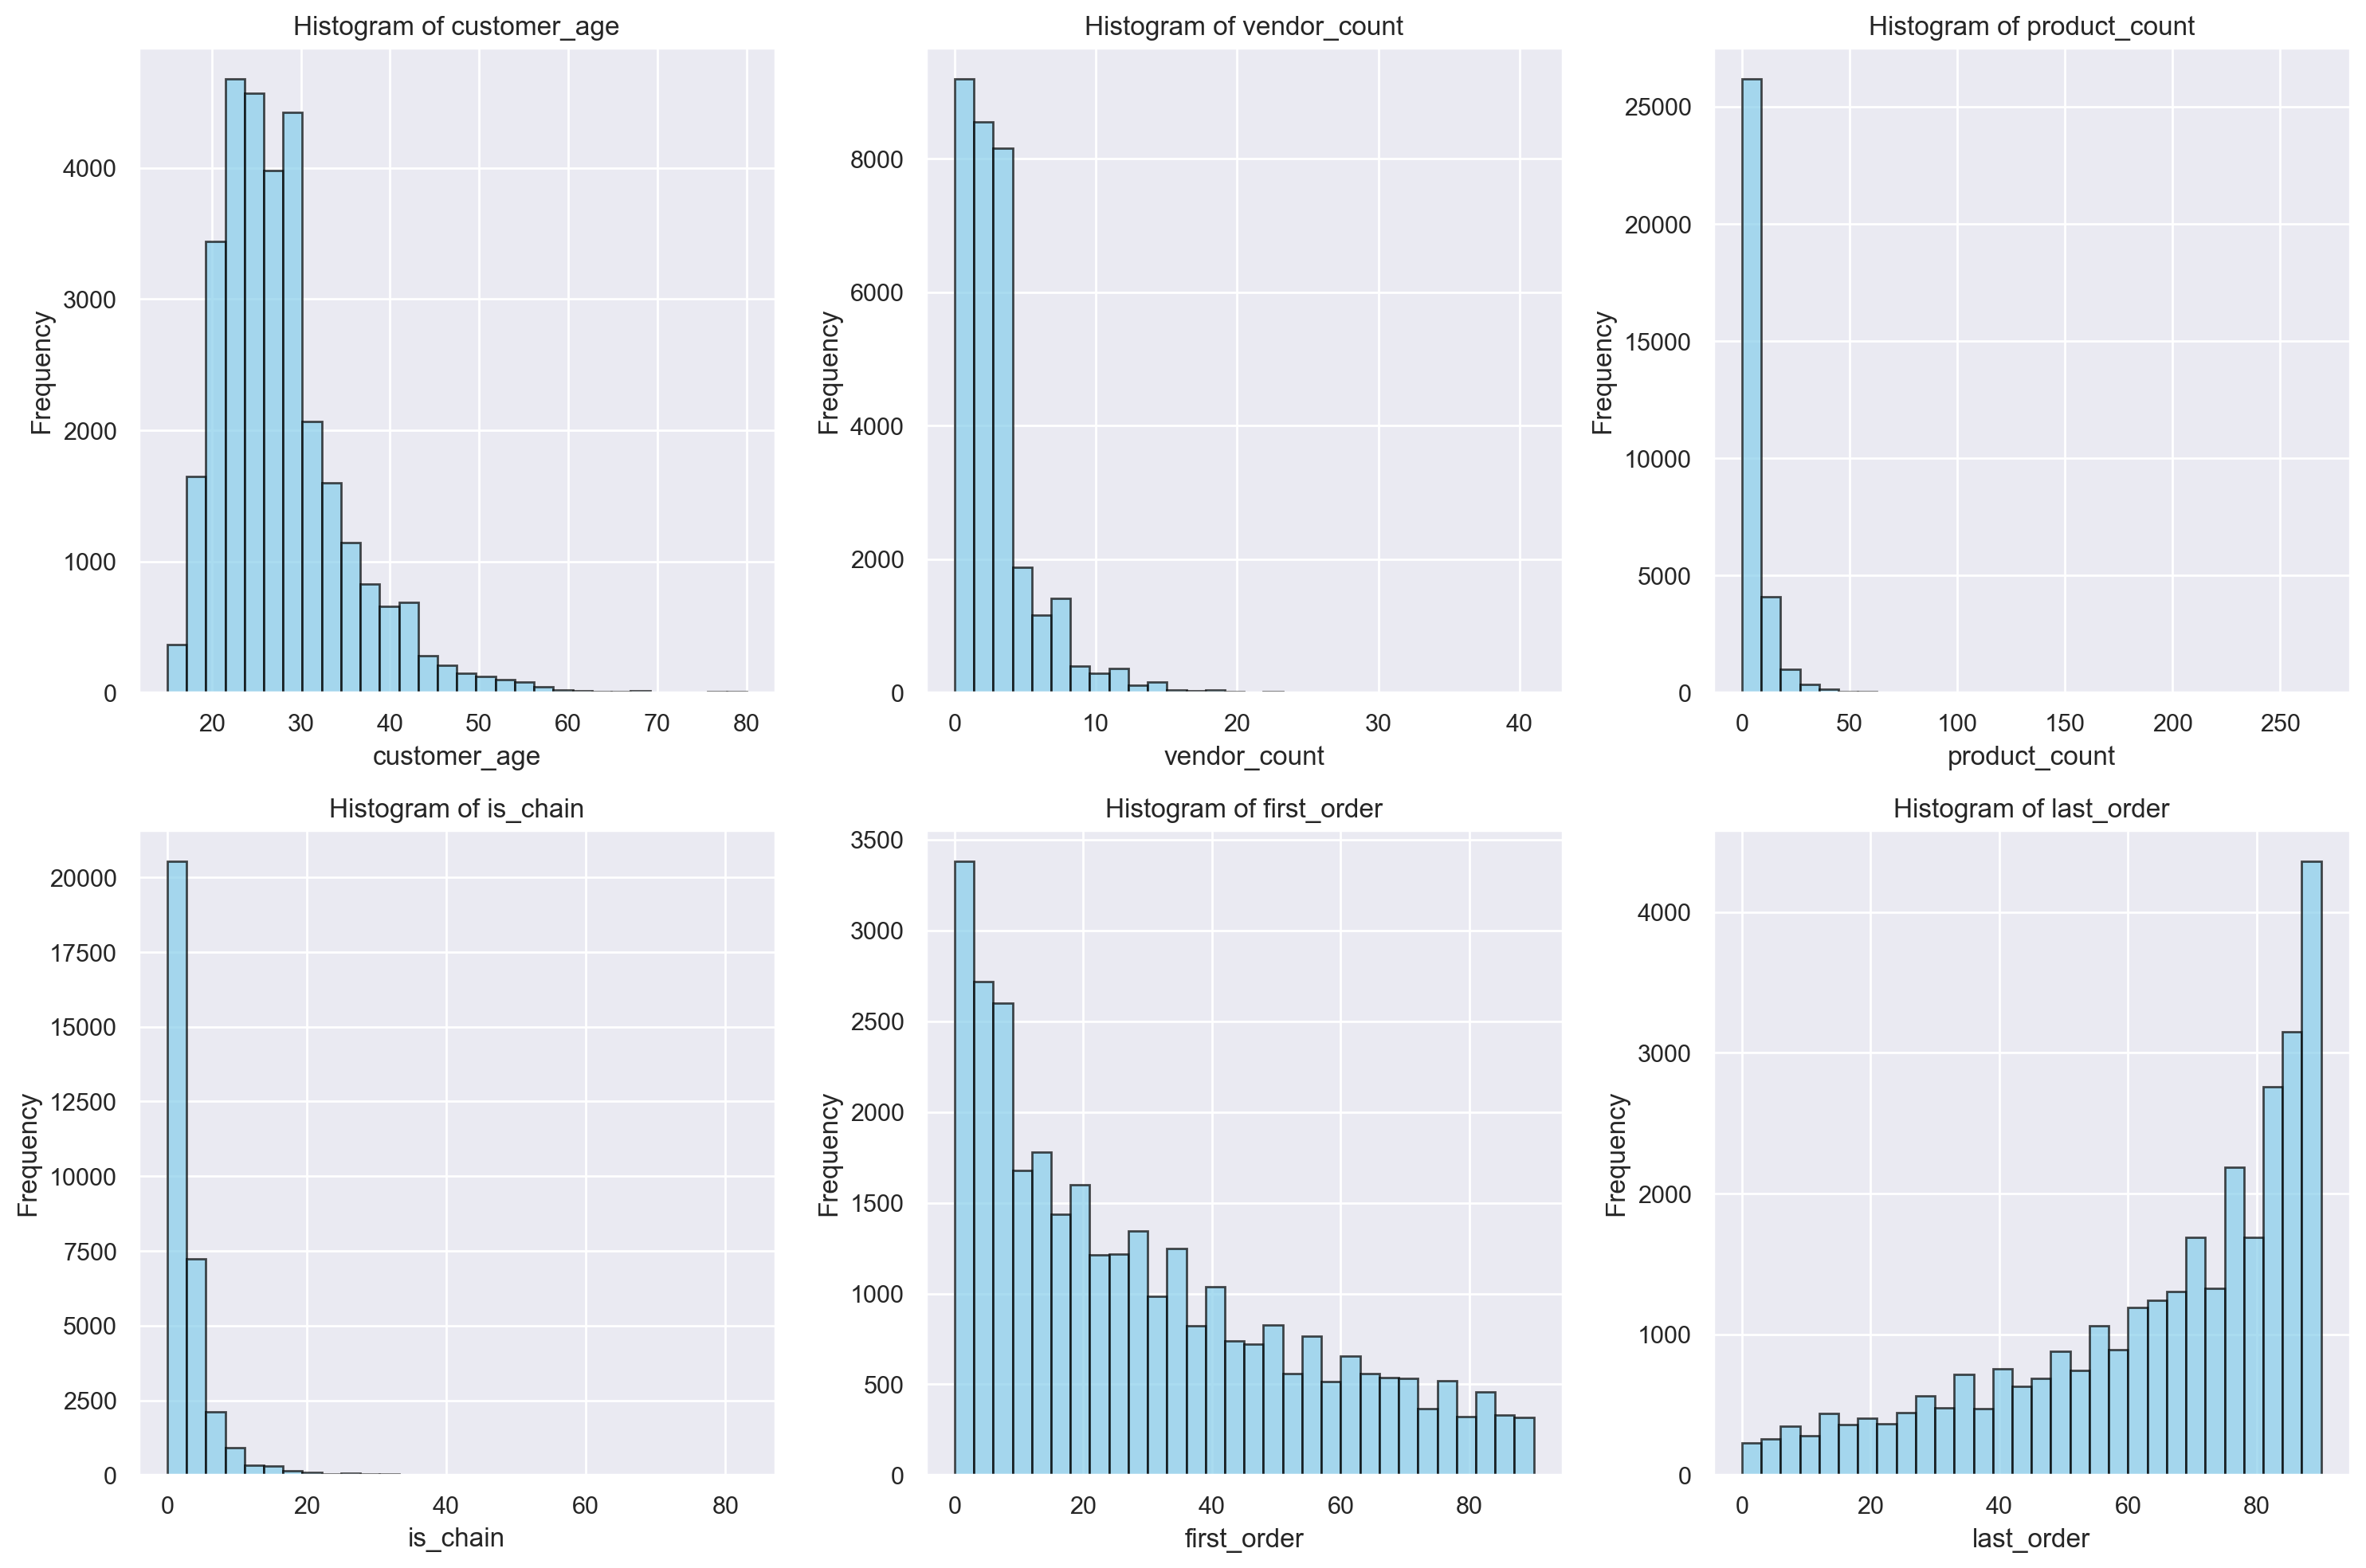

In [265]:
# Number of histograms to create
num_features = len(numerical_features)

# Determine the grid size (rows and columns)
cols = 3
rows = math.ceil(num_features / cols)  

# Create a figure with the specified number of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Turn off any remaining empty plots in the grid
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

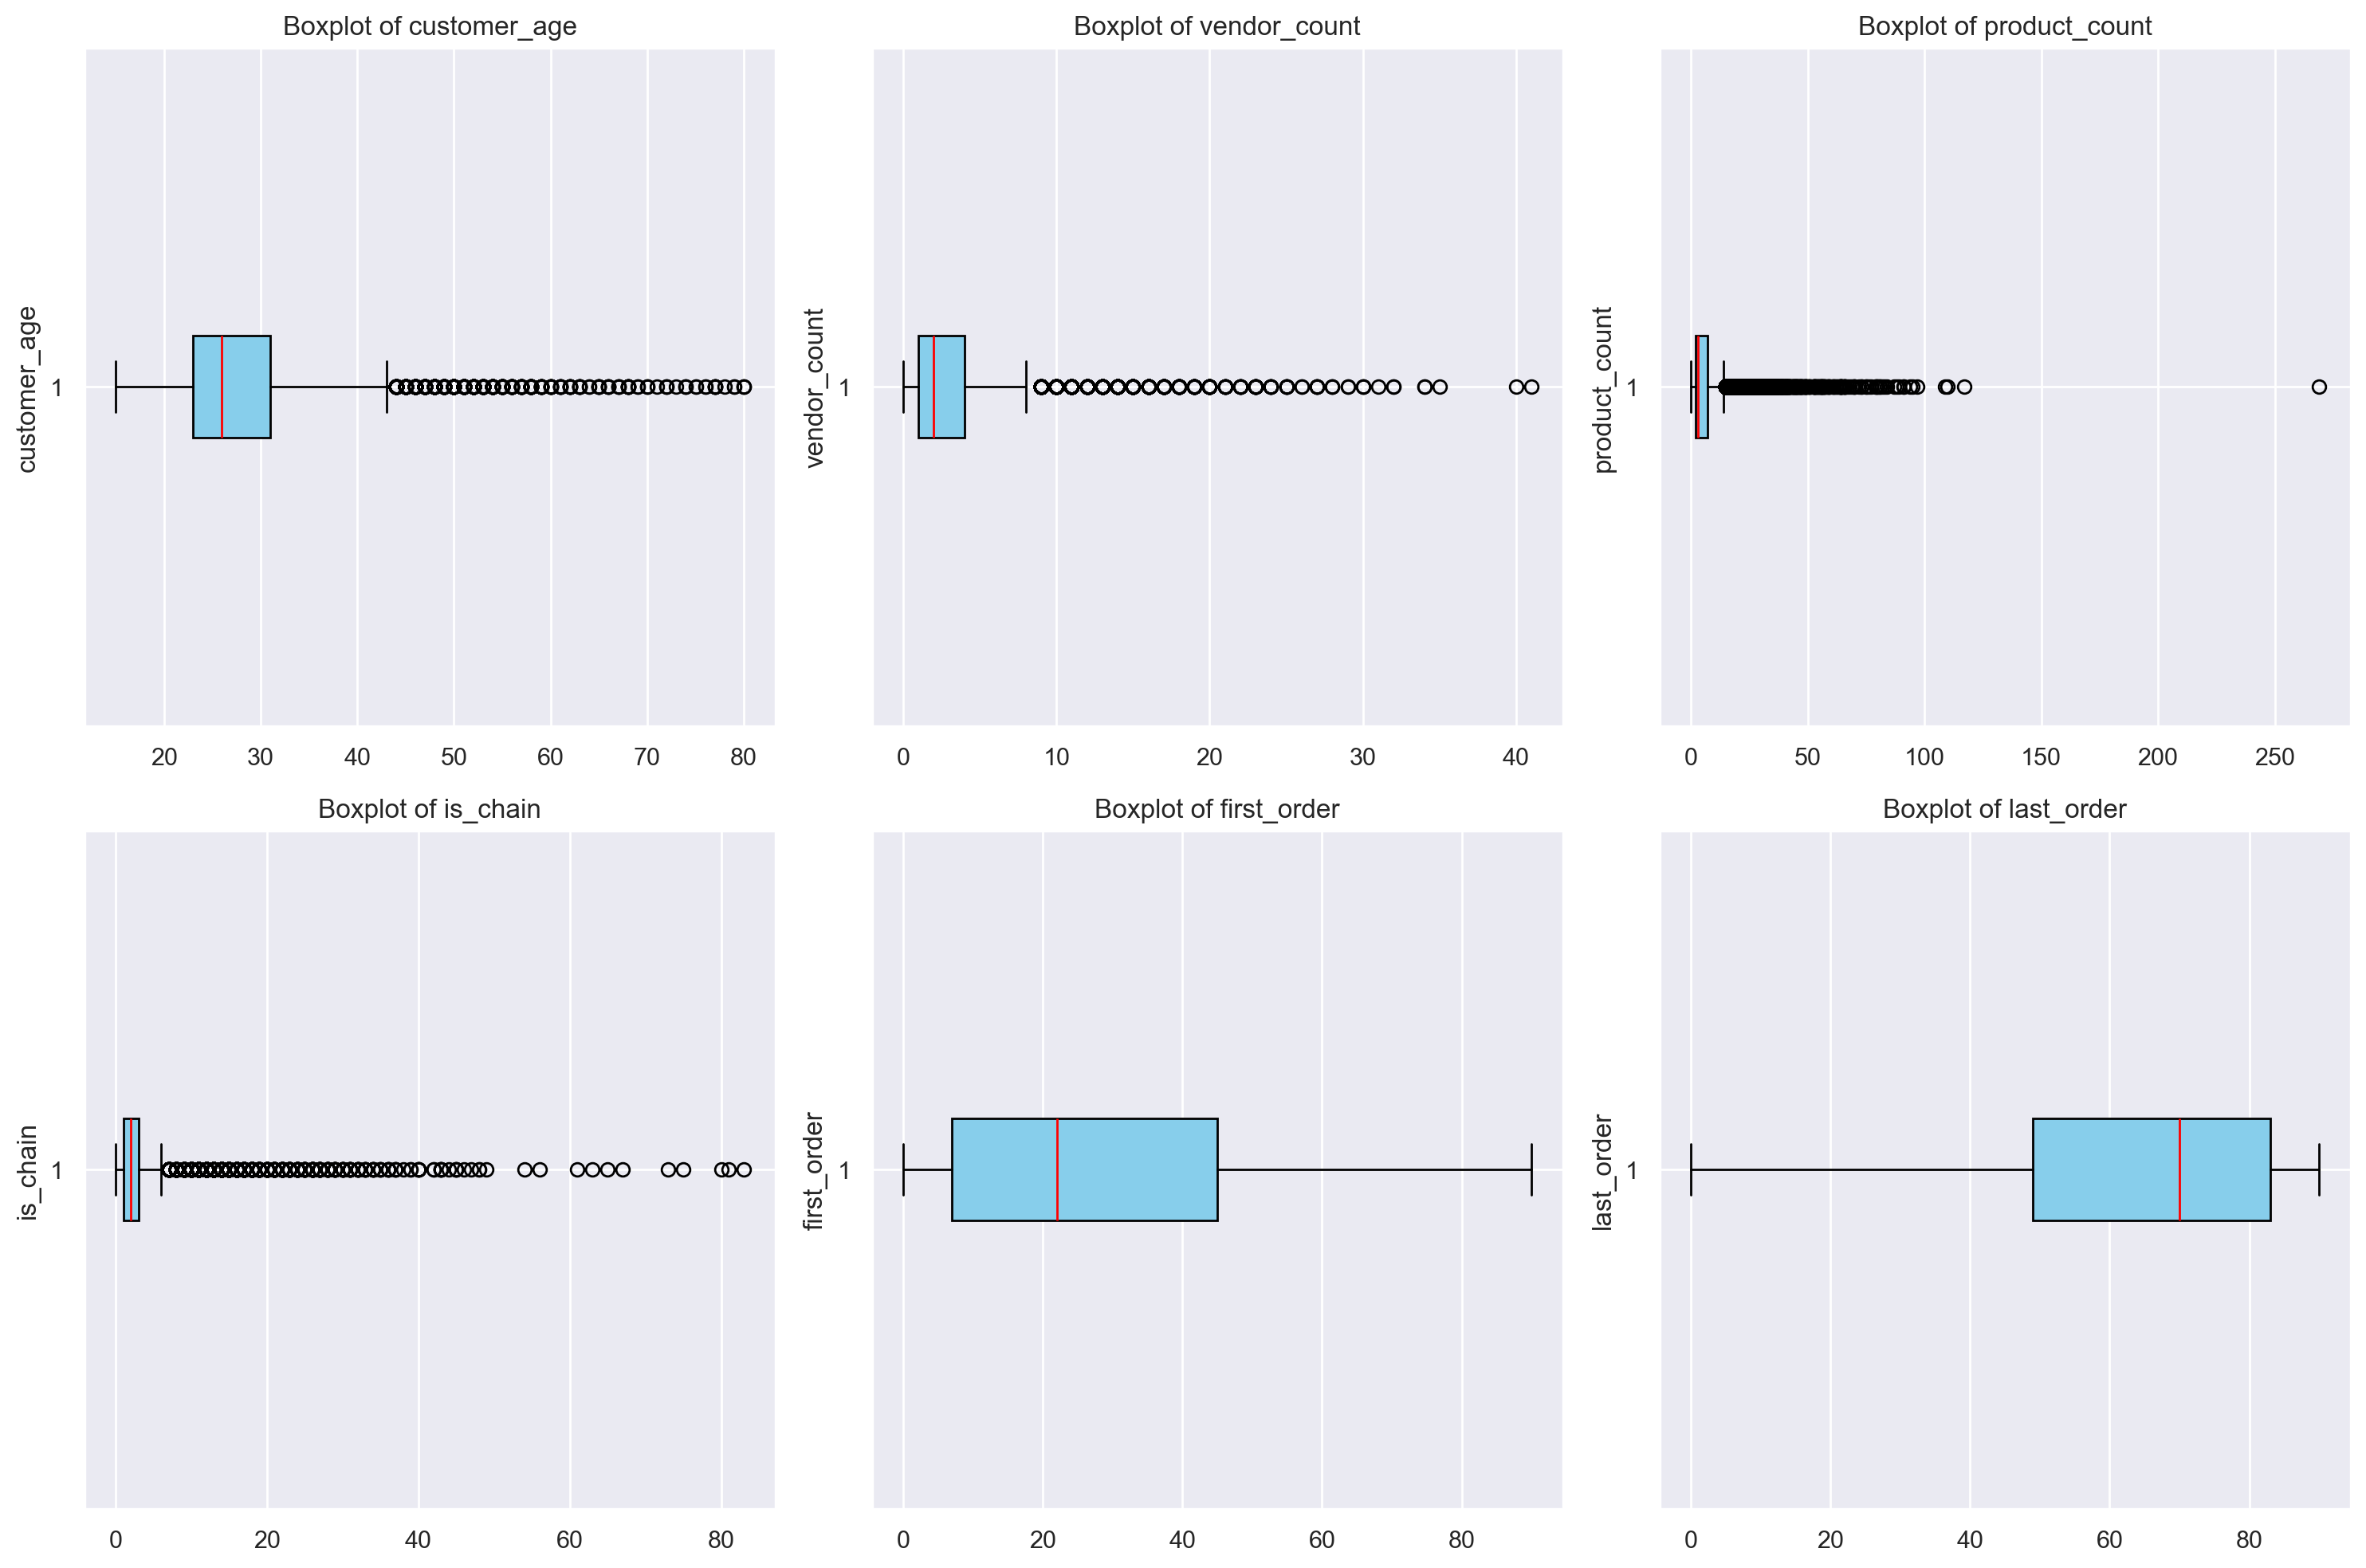

In [215]:
# Number of boxplots to create
num_features = len(numerical_features)

# Determine the grid size (rows and columns)
cols = 3  
rows = math.ceil(num_features / cols)  

# Create a figure with the specified number of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  

# Plot boxplots for each numerical feature
for i, feature in enumerate(numerical_features):
    
    axes[i].boxplot(df[feature].dropna(), patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'),
                    medianprops=dict(color='red'), whiskerprops=dict(color='black'), capprops=dict(color='black'), vert=False)
   
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)

# Turn off any remaining empty plots in the grid
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [259]:
def analyze_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    percentage = (len(outliers) / len(data)) * 100  # Calculate percentage of outliers
    return len(outliers), percentage

# Analyze outliers for the specified numerical variables
for column in numerical_features:
    outlier_count, outlier_percentage = analyze_outliers(df[column])
    print(f'Variable: {column}')
    print(f'Count of outliers: {outlier_count}')
    print(f'Percentage of outliers: {outlier_percentage:.2f}%')
    print('-' * 40)

Variable: customer_age
Count of outliers: 1083
Percentage of outliers: 3.40%
----------------------------------------
Variable: vendor_count
Count of outliers: 1524
Percentage of outliers: 4.78%
----------------------------------------
Variable: product_count
Count of outliers: 2371
Percentage of outliers: 7.44%
----------------------------------------
Variable: is_chain
Count of outliers: 3155
Percentage of outliers: 9.89%
----------------------------------------
Variable: first_order
Count of outliers: 0
Percentage of outliers: 0.00%
----------------------------------------
Variable: last_order
Count of outliers: 0
Percentage of outliers: 0.00%
----------------------------------------


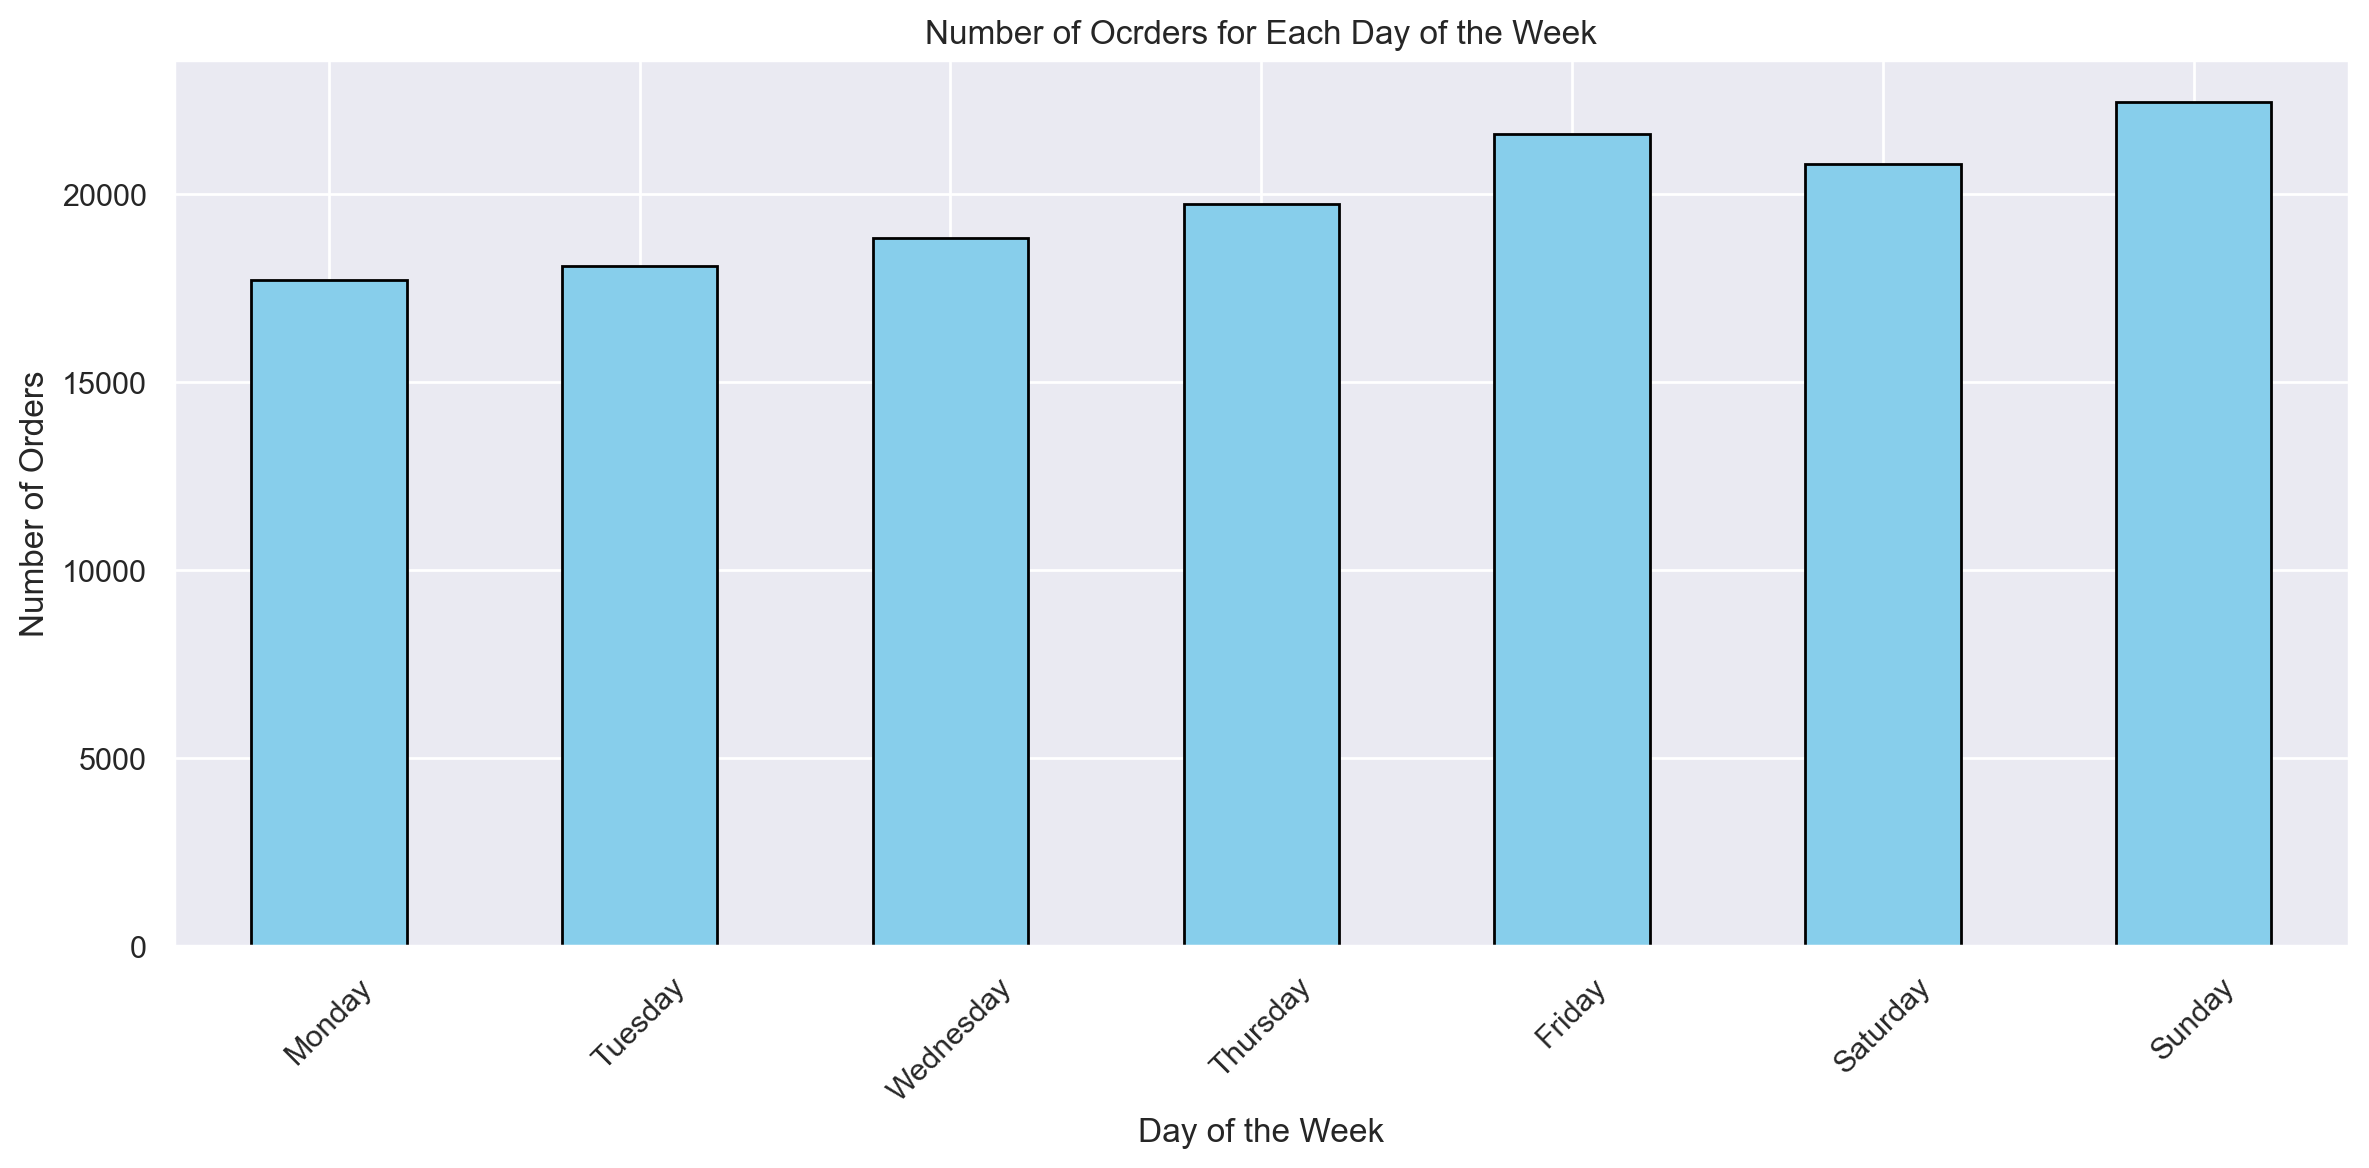

In [216]:
DOW_counts = df[dow_columns].sum()
#DOW_counts_sorted = DOW_counts.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
DOW_counts.plot(kind='bar', 
                color='skyblue', 
                edgecolor='black')

plt.title('Number of Ocrders for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

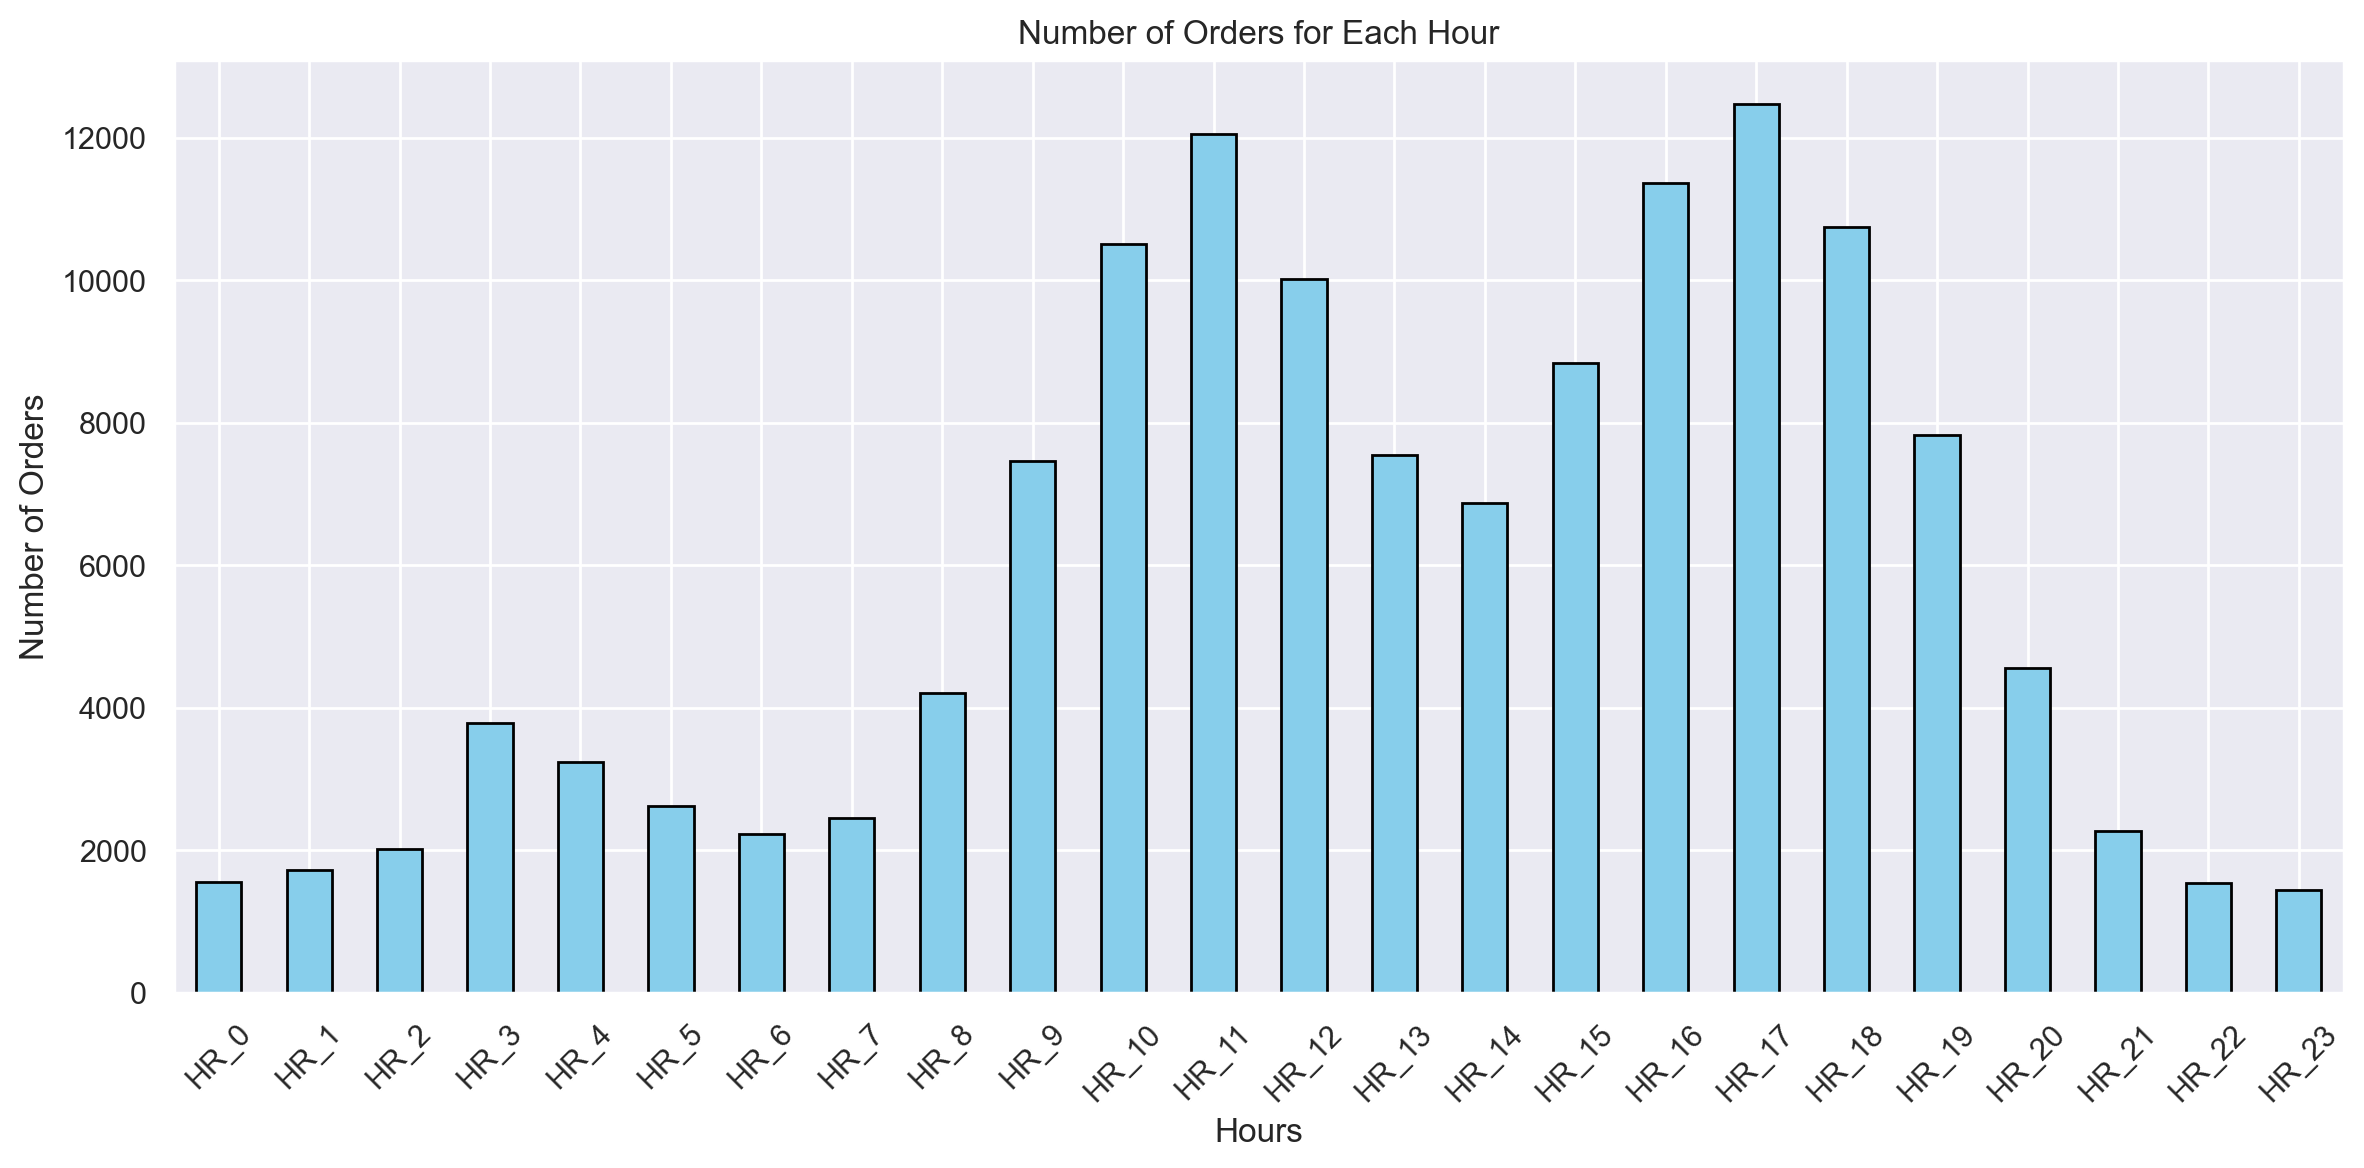

In [217]:
plt.figure(figsize=(12, 6))
HR_counts.plot(kind='bar', 
               color='skyblue', 
               edgecolor='black')

plt.title('Number of Orders for Each Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

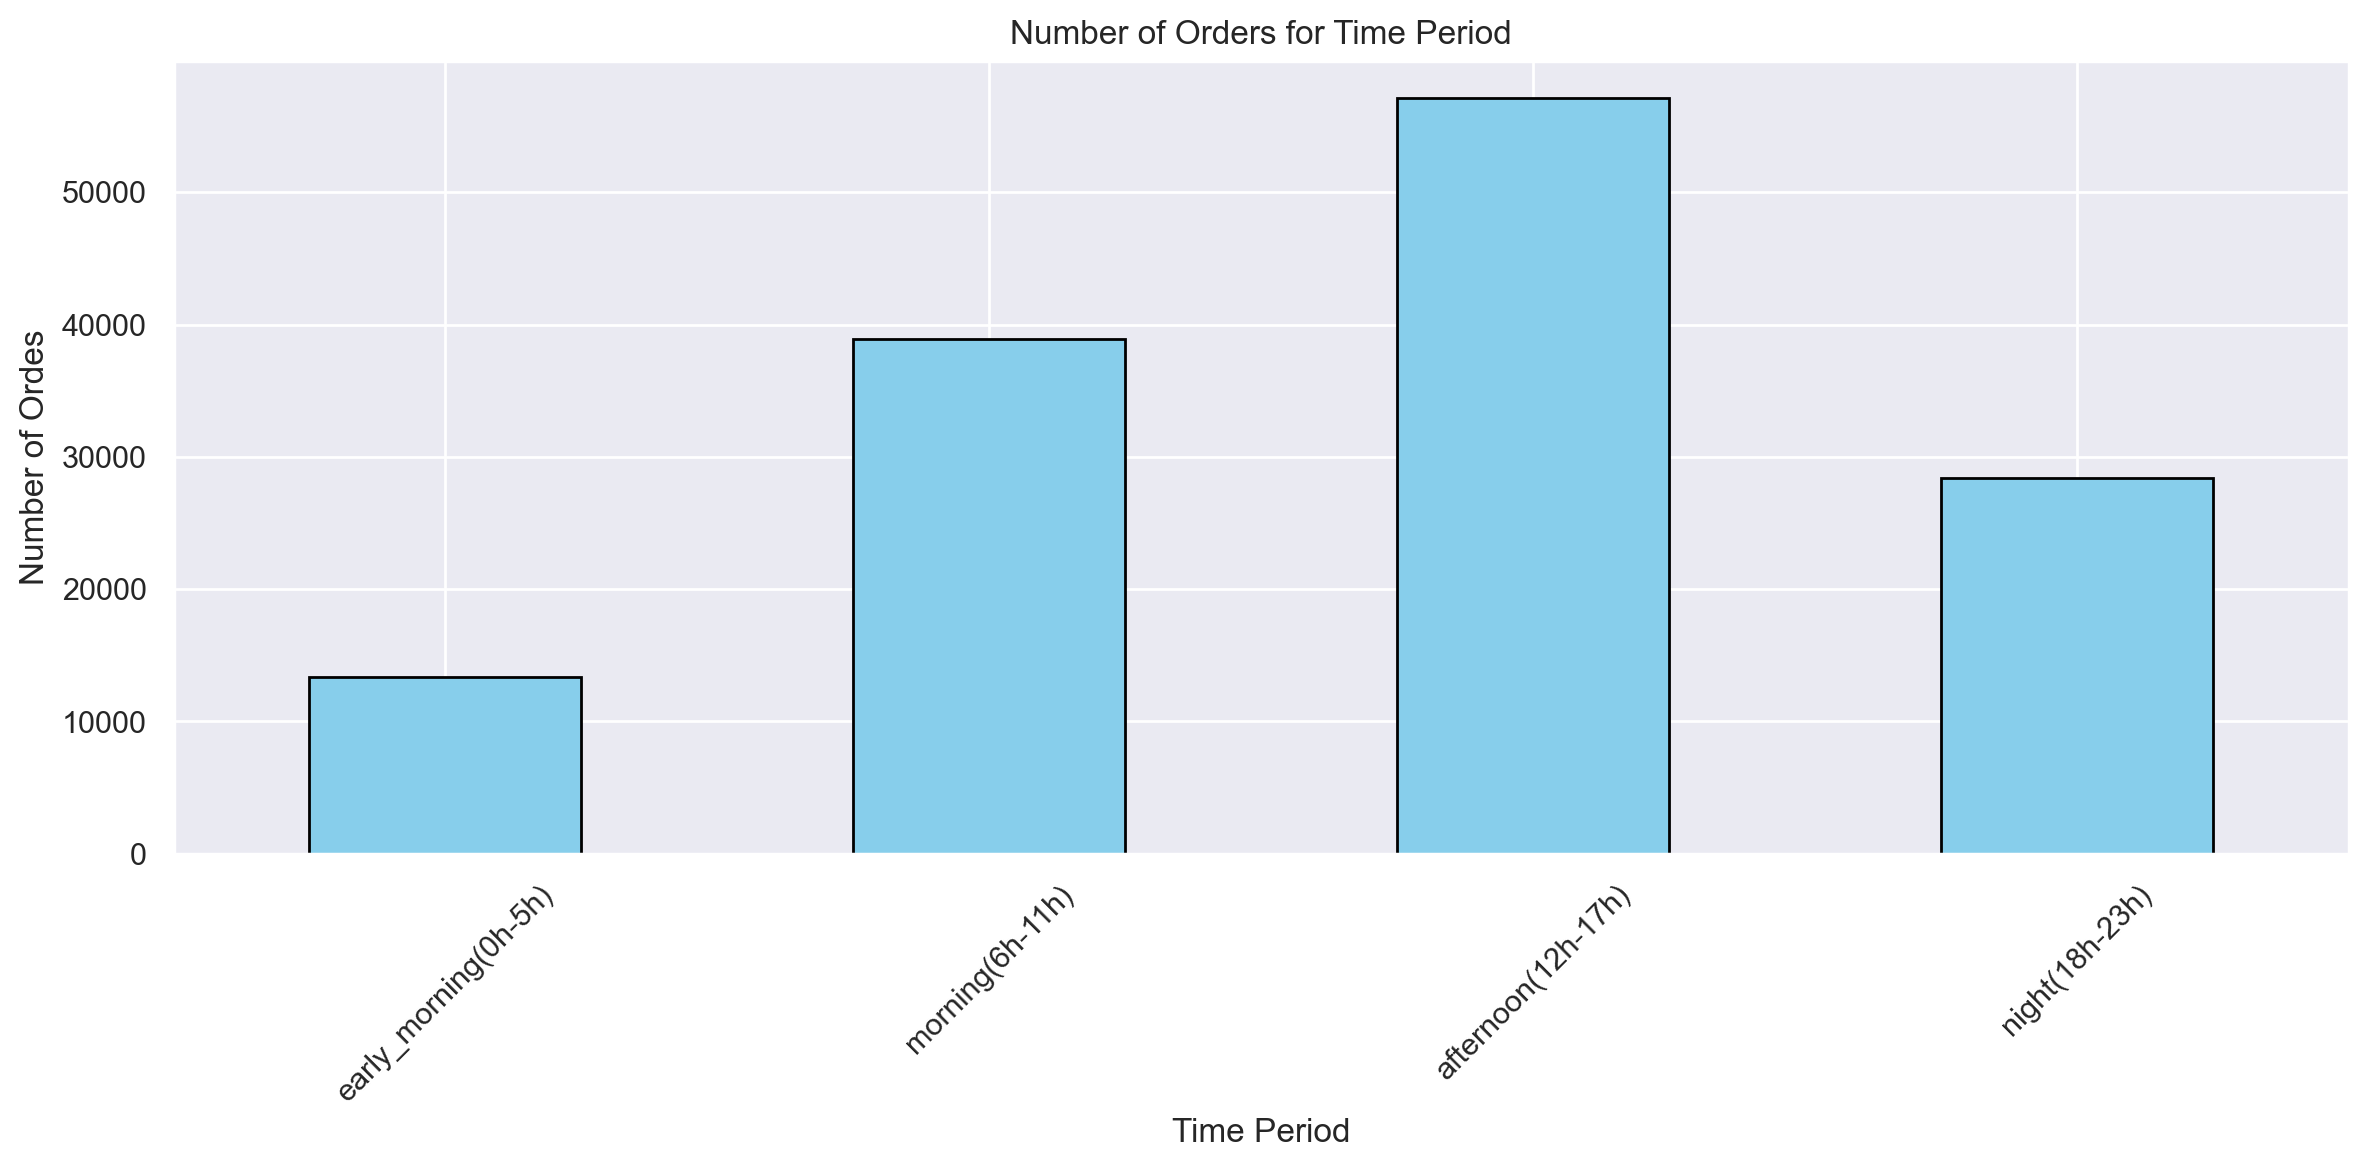

In [218]:
plt.figure(figsize=(12, 6))
time_counts.plot(kind='bar', 
                 color='skyblue', 
                 edgecolor='black')

plt.title('Number of Orders for Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Ordes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#NAO FAZ MUITO SENTIDO, PELO MENOS COMO ESPERAVAMOS, PONDERAR MUDAR PARA OS OUTROS PERÍODOS DE TEMPO ANTERIOR

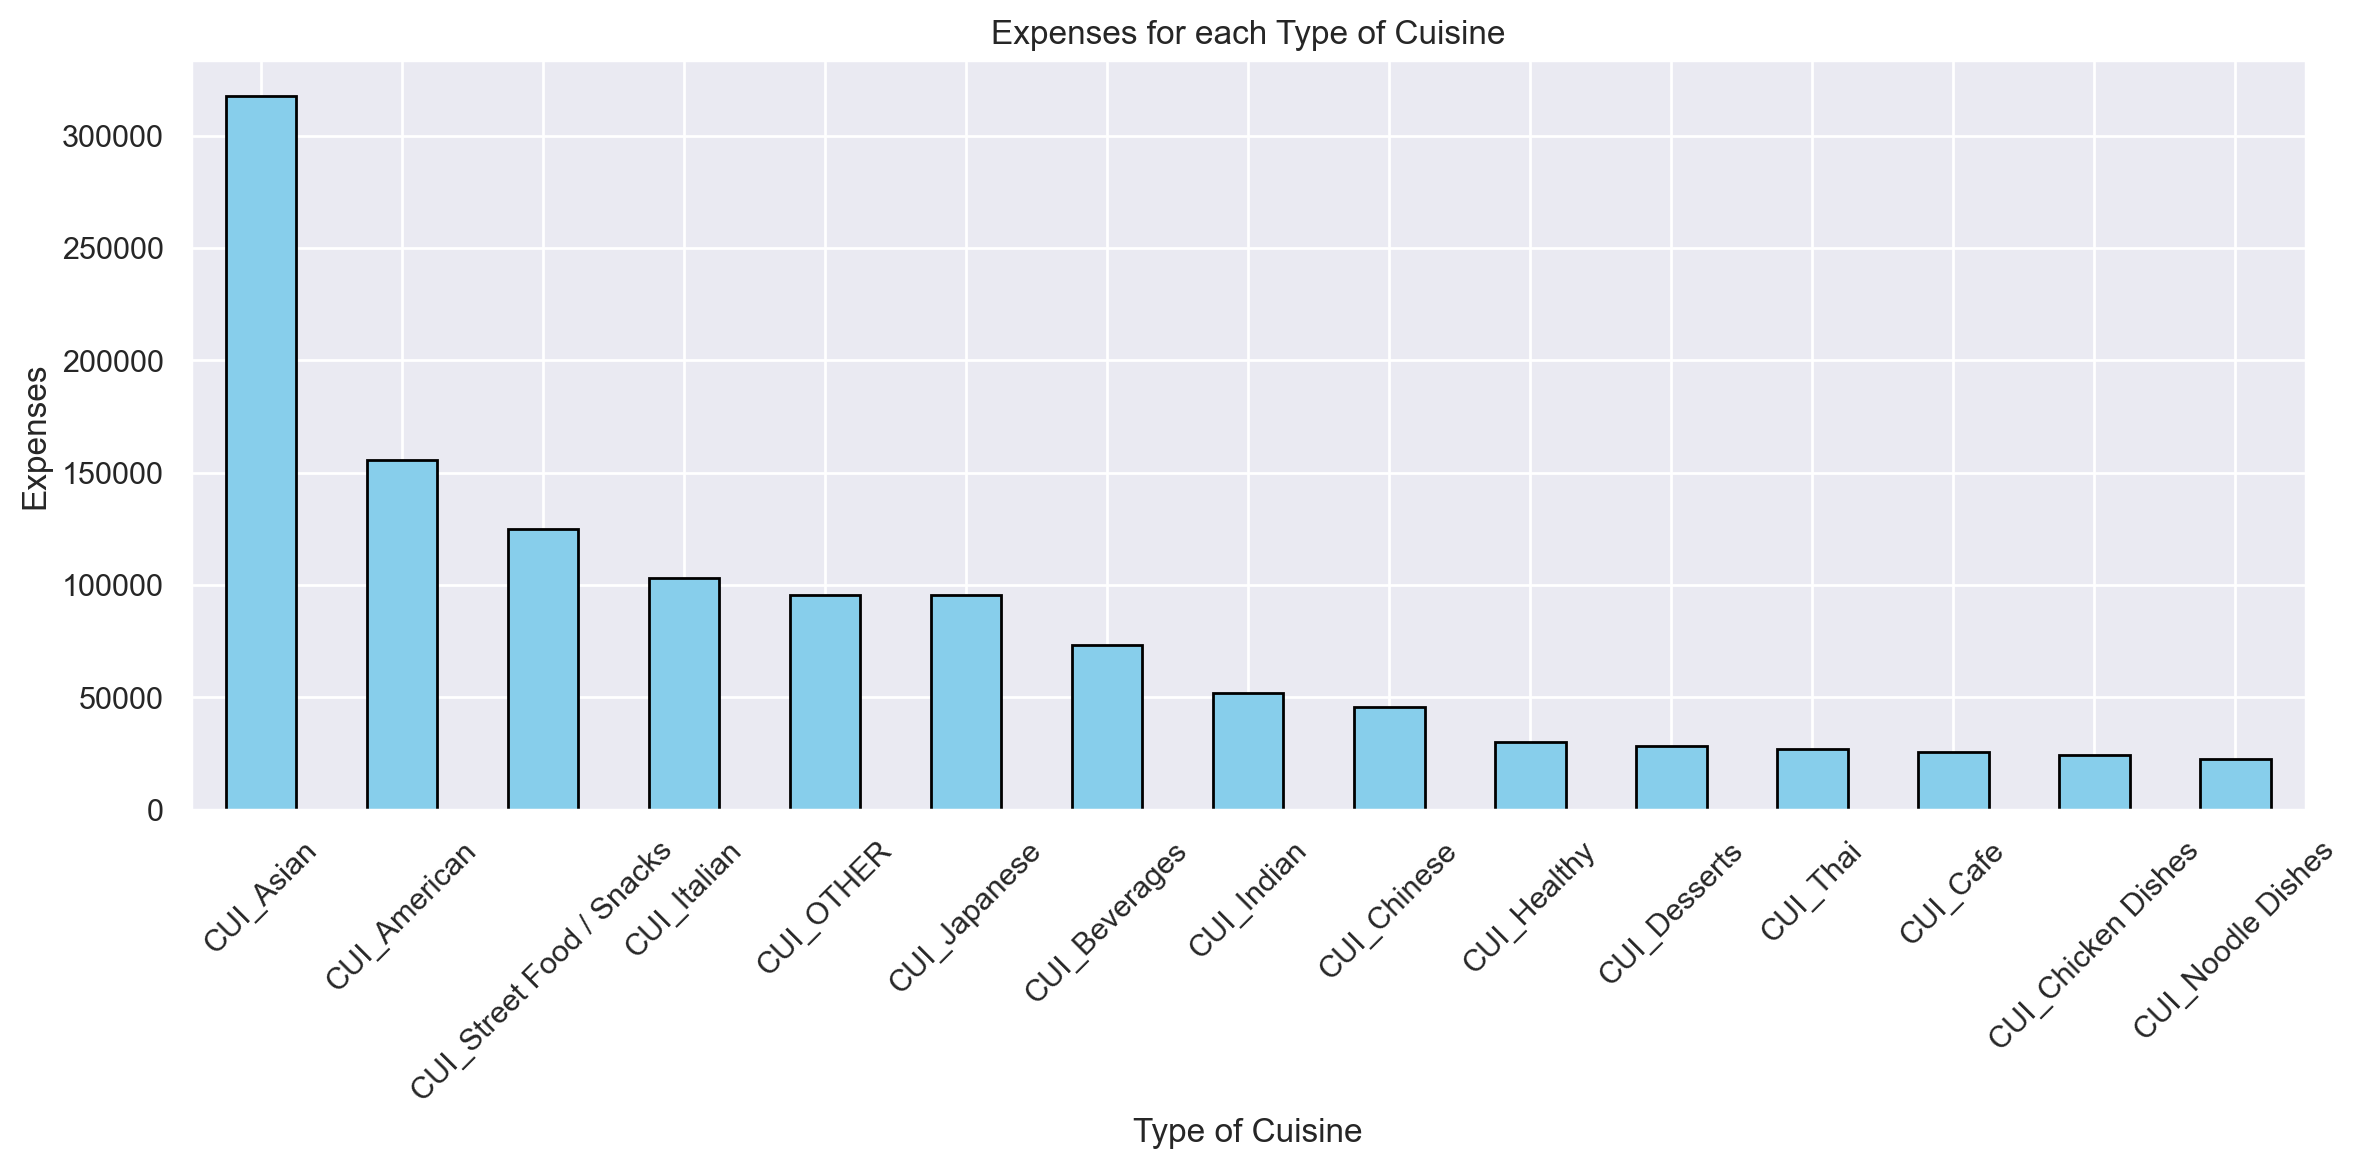

In [219]:
CUI_counts_sorted = CUI_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
CUI_counts_sorted.plot(kind='bar', 
                       color='skyblue', 
                       edgecolor='black')

plt.title('Expenses for each Type of Cuisine')
plt.xlabel('Type of Cuisine')
plt.ylabel('Expenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Categorical Features

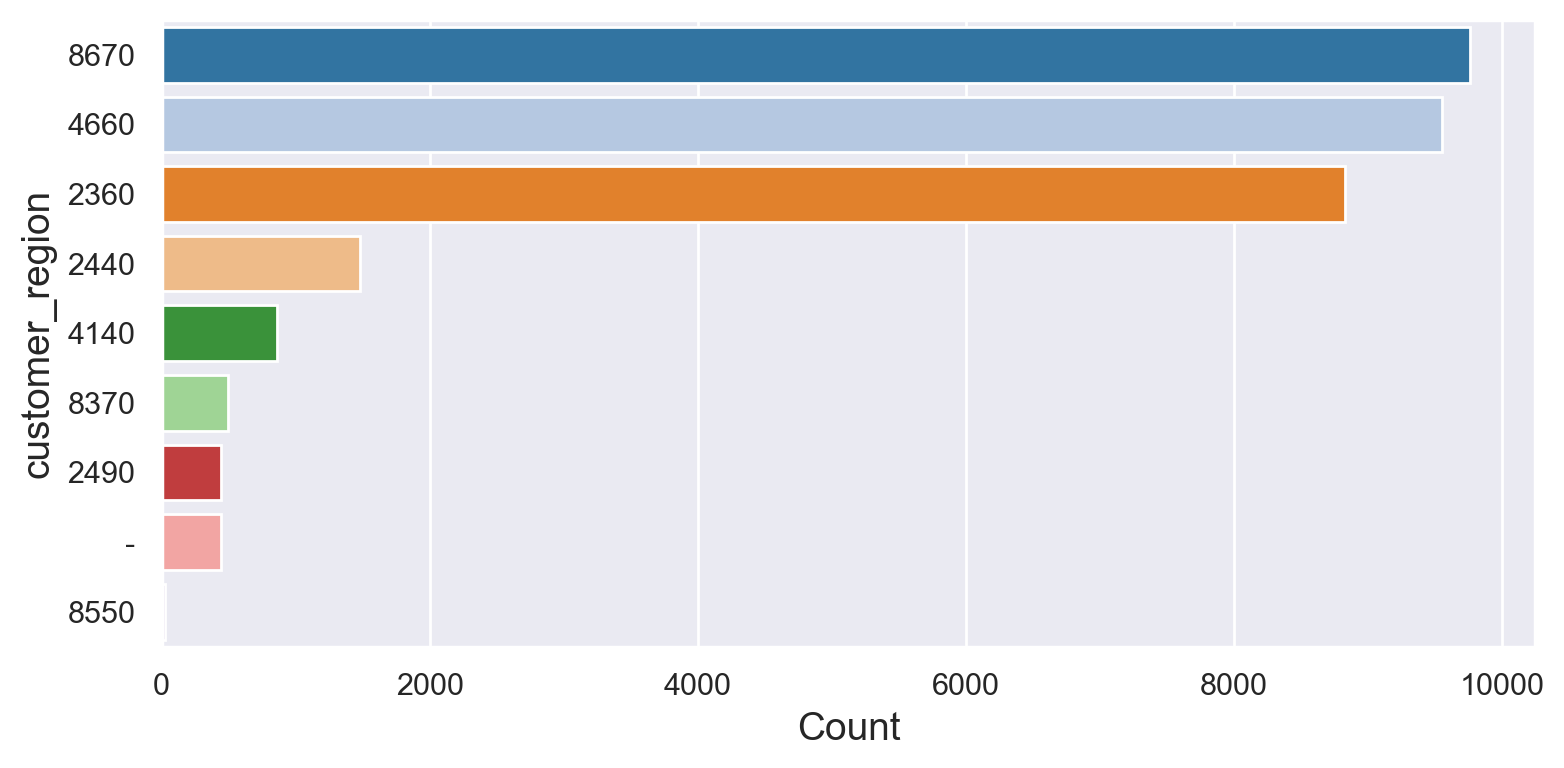

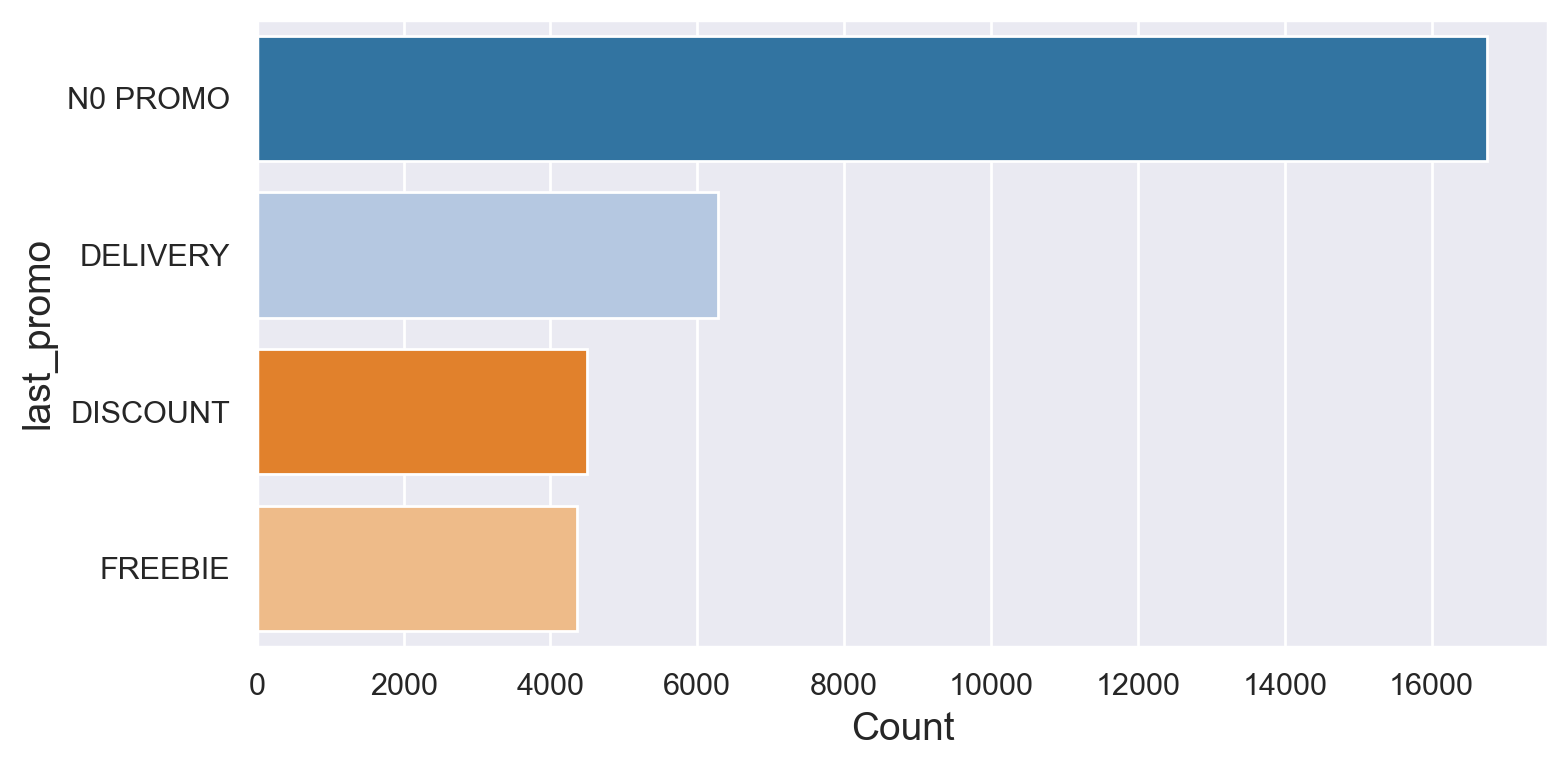

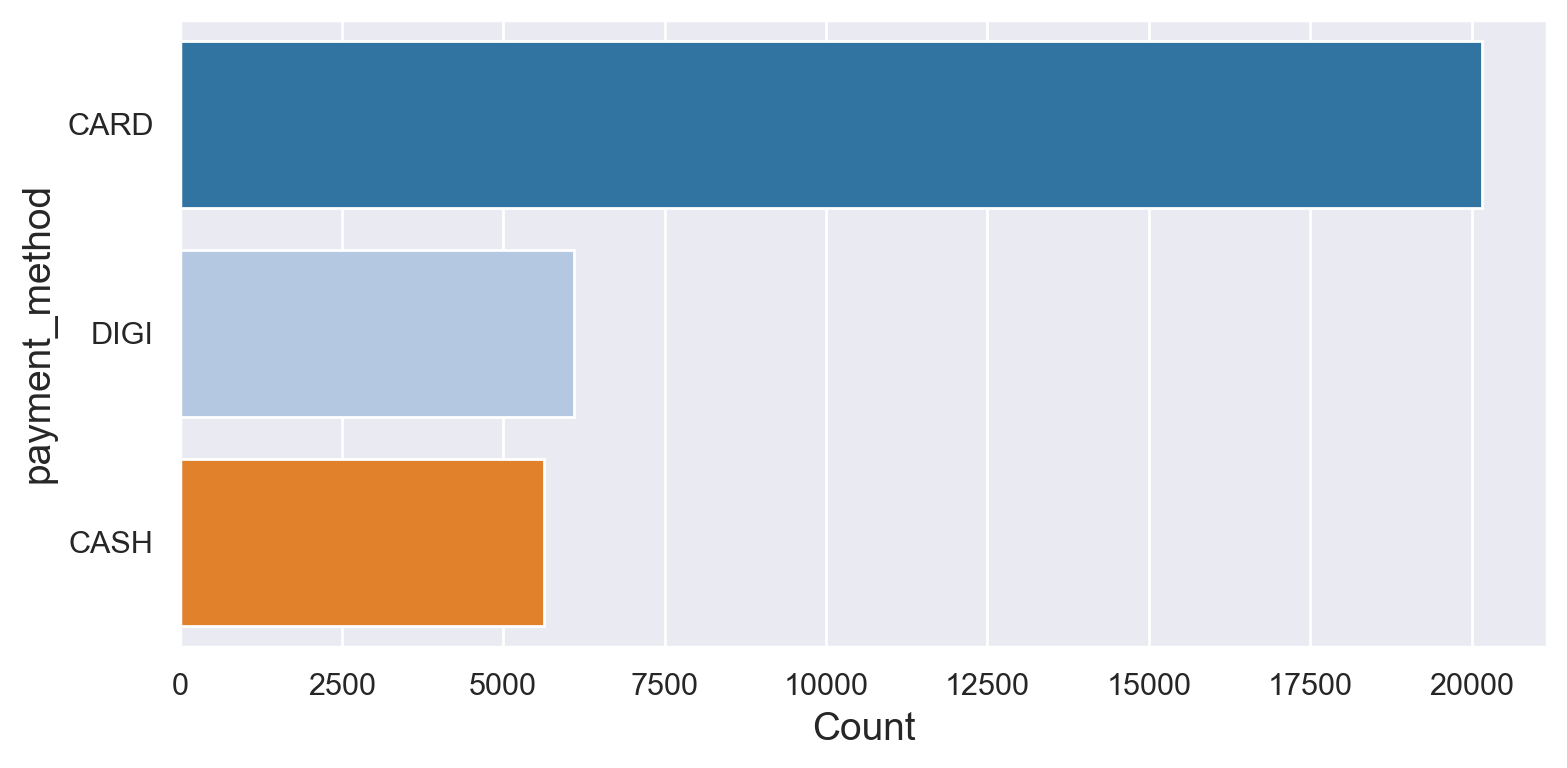

In [220]:
for column in categorical_features:
    top_categories = df[column].value_counts().head(10)

   
    plt.figure(figsize=(8, 4))
    sns.barplot(
        y=top_categories.index,  
        x=top_categories.values, 
        palette='tab20'  
    )

  
    
    plt.xlabel('Count', fontsize=14)
    plt.ylabel(column, fontsize=14)

   
    plt.tight_layout()
    plt.show()

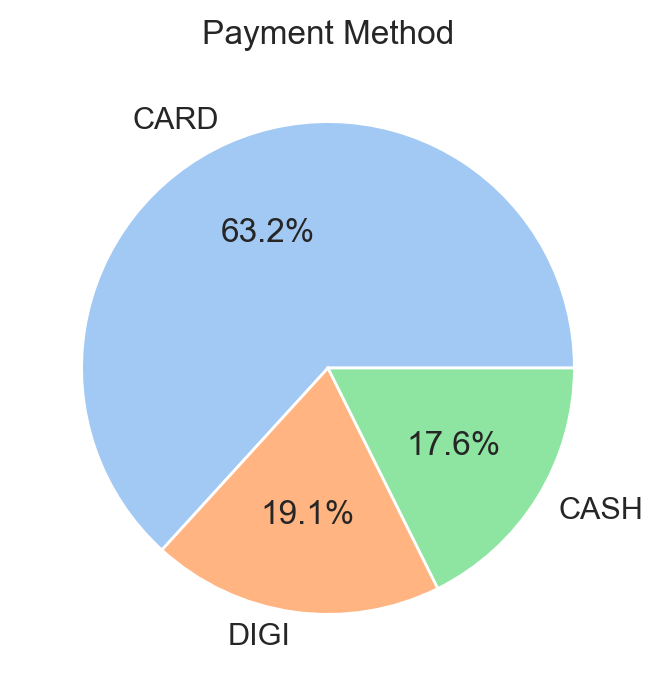

In [221]:
plt.figure(figsize=(8, 6))
payment_method_pie = df['payment_method'].value_counts() \
    .plot (kind='pie', 
           title='Payment Method', 
           autopct='%1.1f%%',
           colors=sns.color_palette("pastel"),
           figsize=(5, 4), 
           ylabel="")

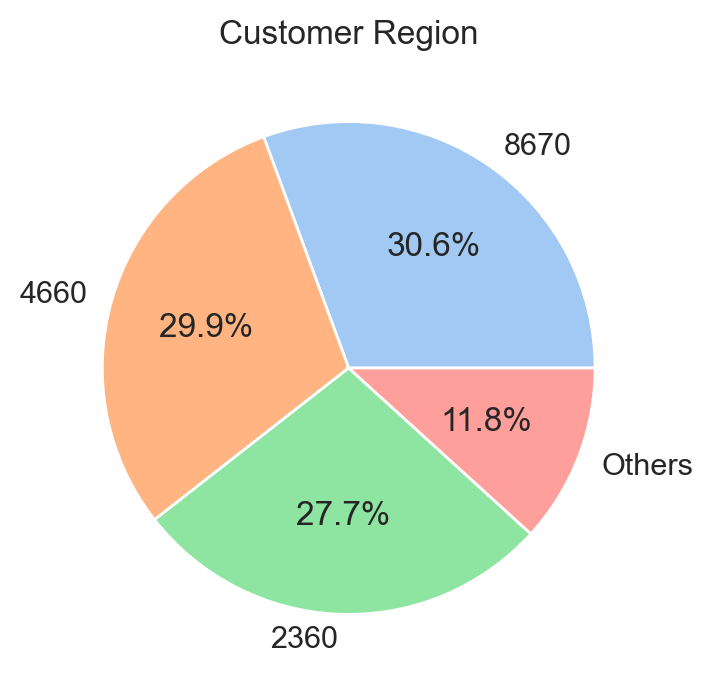

In [222]:
threshold = 0.05 * df['customer_region'].value_counts().sum()

customer_region_counts = df['customer_region'].value_counts()

others = customer_region_counts[customer_region_counts < threshold].sum()

customer_region_counts = customer_region_counts[customer_region_counts >= threshold]
customer_region_counts['Others'] = others

plt.figure(figsize=(8, 6))
customer_region = customer_region_counts \
    .plot (kind='pie', 
           title='Customer Region', 
           autopct='%1.1f%%',
           colors=sns.color_palette("pastel"),
           figsize=(5, 4), 
           ylabel="")


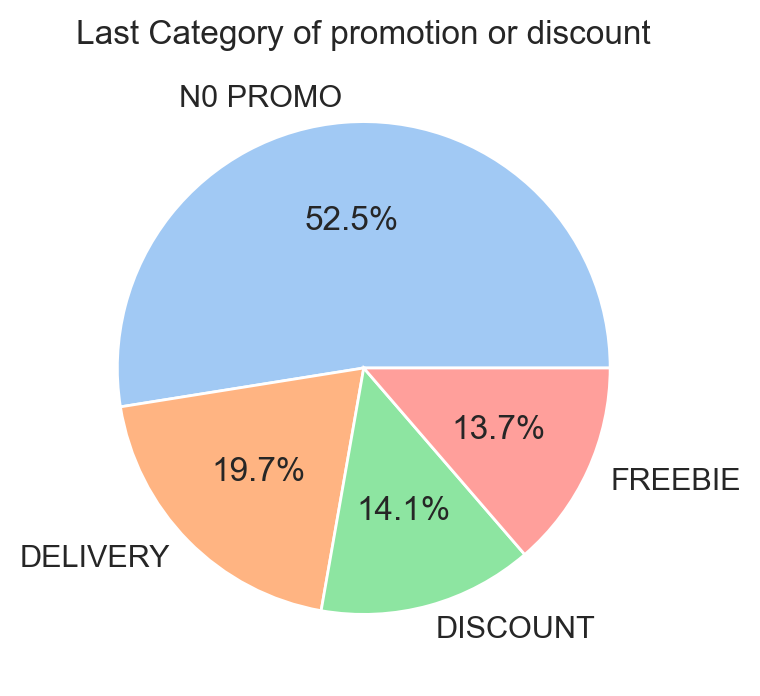

In [223]:
plt.figure(figsize=(8, 6))

#promo_df = df['last_promo'].apply(lambda x: 'NO PROMO' if(x=='-') else x  )
promo_category = df['last_promo'].value_counts() \
    .plot (kind='pie', 
           title='Last Category of promotion or discount', 
           autopct='%1.1f%%',
           colors=sns.color_palette("pastel"),
           figsize=(5, 4), 
           ylabel="")


# 4. Feature Relationships

## New Features

In [224]:
# Cuisine diversity (number of different cuisines ordered)
df['cuisine_diversity'] = (df[CUI_columns] > 0).sum(axis=1)

In [225]:
# Total spend per customer
df['total_spend'] = df[CUI_columns].sum(axis=1)

In [250]:
# Preferred cuisine
df['preferred_cuisine'] = df[CUI_columns].idxmax(axis=1)

In [227]:
df_corr = df[['customer_age', 
              'vendor_count',
               'product_count', 
              'is_chain', 
              'first_order', 
              'last_order'
             ]].corr()
df_corr

customer_age  vendor_count  product_count  is_chain  \
customer_age       1.000000      0.000952       0.005372  0.001783   
vendor_count       0.000952      1.000000       0.827636  0.762916   
product_count      0.005372      0.827636       1.000000  0.827071   
is_chain           0.001783      0.762916       0.827071  1.000000   
first_order        0.004643     -0.386735      -0.358568 -0.331144   
last_order         0.012715      0.377479       0.350343  0.298150   

               first_order  last_order  
customer_age      0.004643    0.012715  
vendor_count     -0.386735    0.377479  
product_count    -0.358568    0.350343  
is_chain         -0.331144    0.298150  
first_order       1.000000    0.219895  
last_order        0.219895    1.000000

<Axes: >

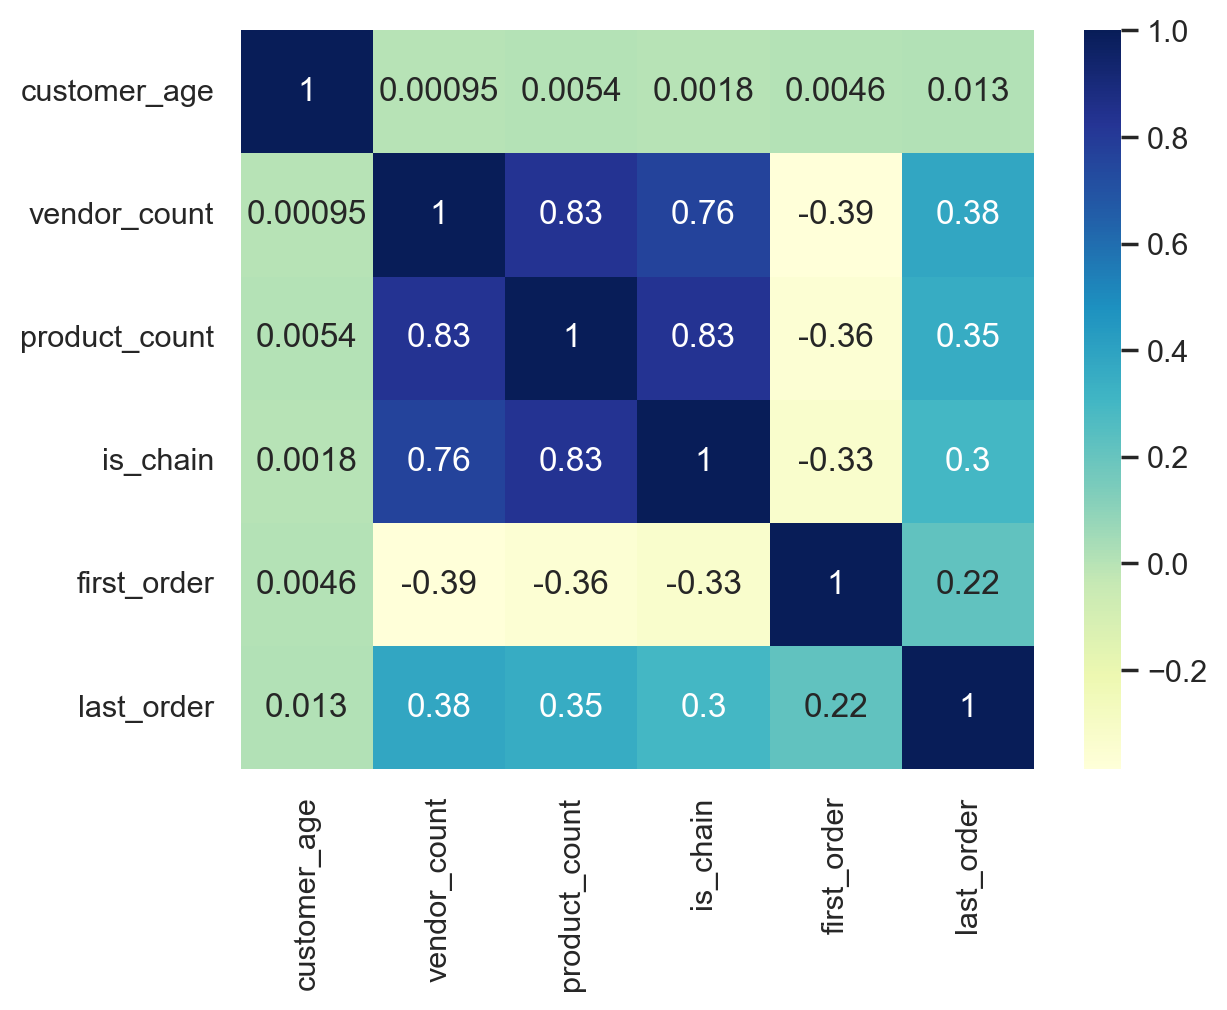

In [228]:
sns.heatmap(df_corr, 
            annot=True, 
            cmap='YlGnBu')

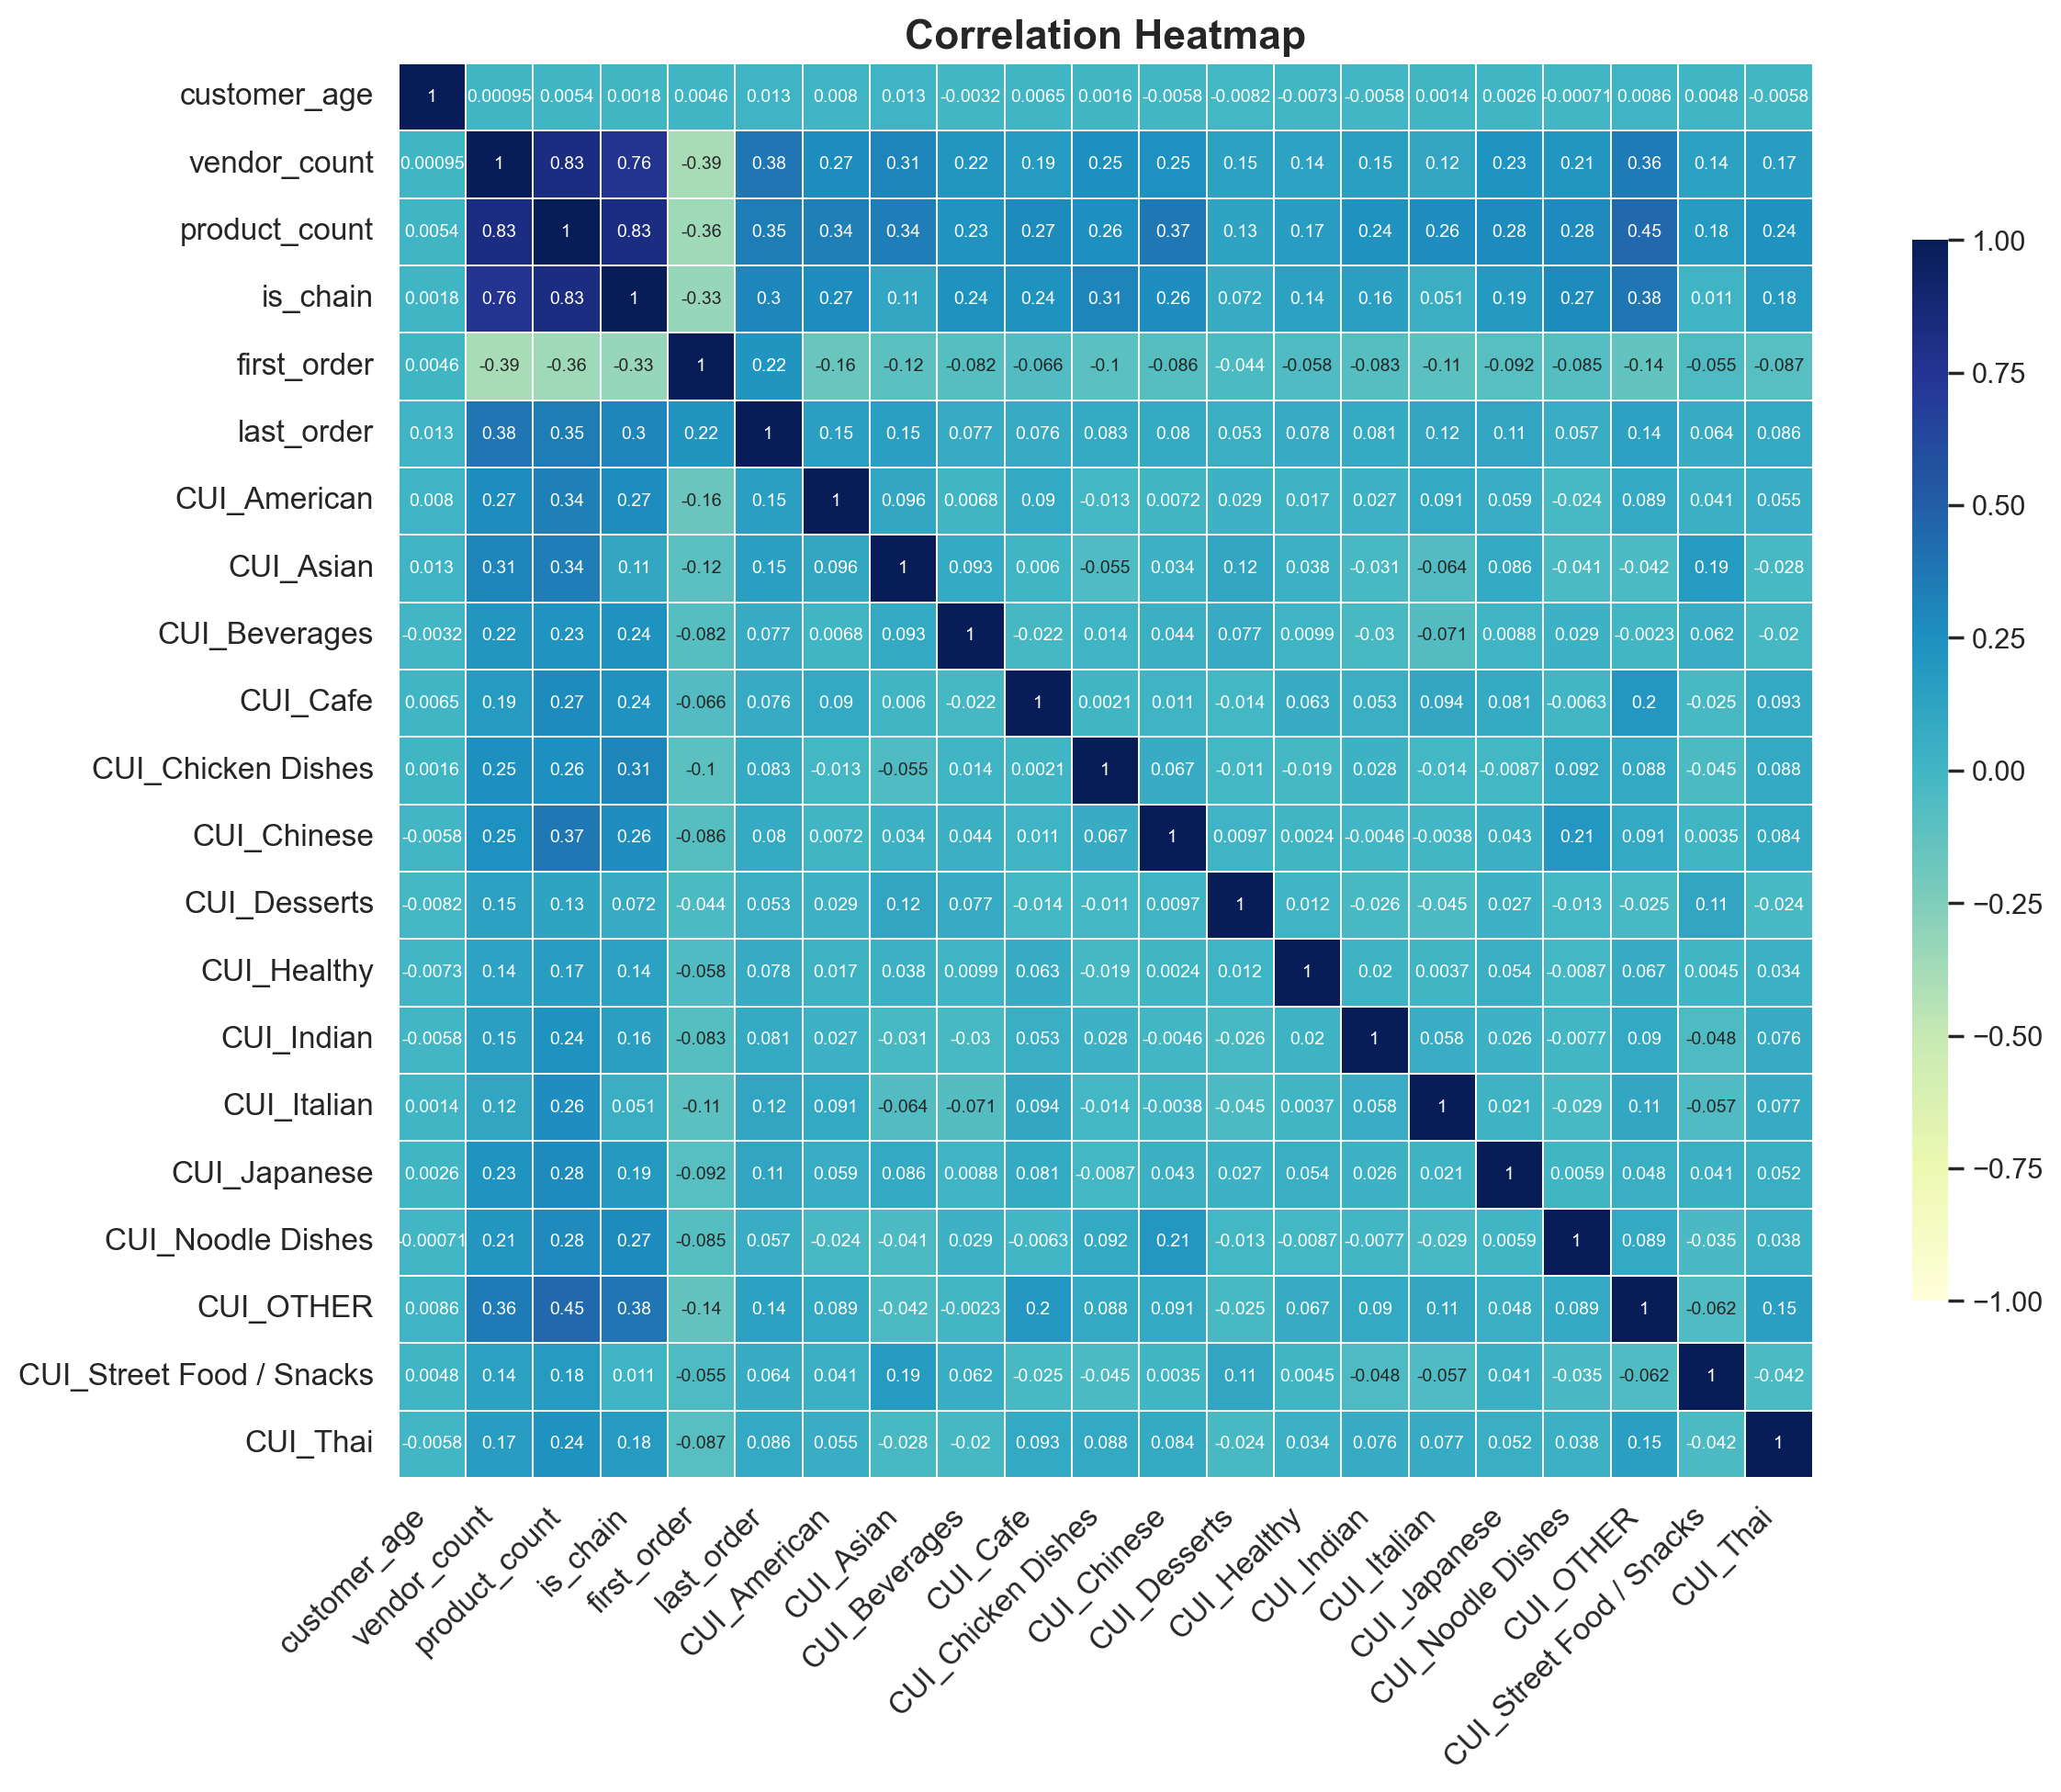

In [229]:
df_corr_all=df[['customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai']].corr()

plt.figure(figsize=(14, 10)) 


sns.heatmap(df_corr_all, annot=True,
            linewidths=0.7, vmin=-1, vmax=1, square=True,
            cbar_kws={'shrink': 0.75, 'aspect': 30}, 
            annot_kws={'size': 7 },  
            cmap='YlGnBu')  

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title('Correlation Heatmap', fontsize=16, weight='bold')

plt.show()

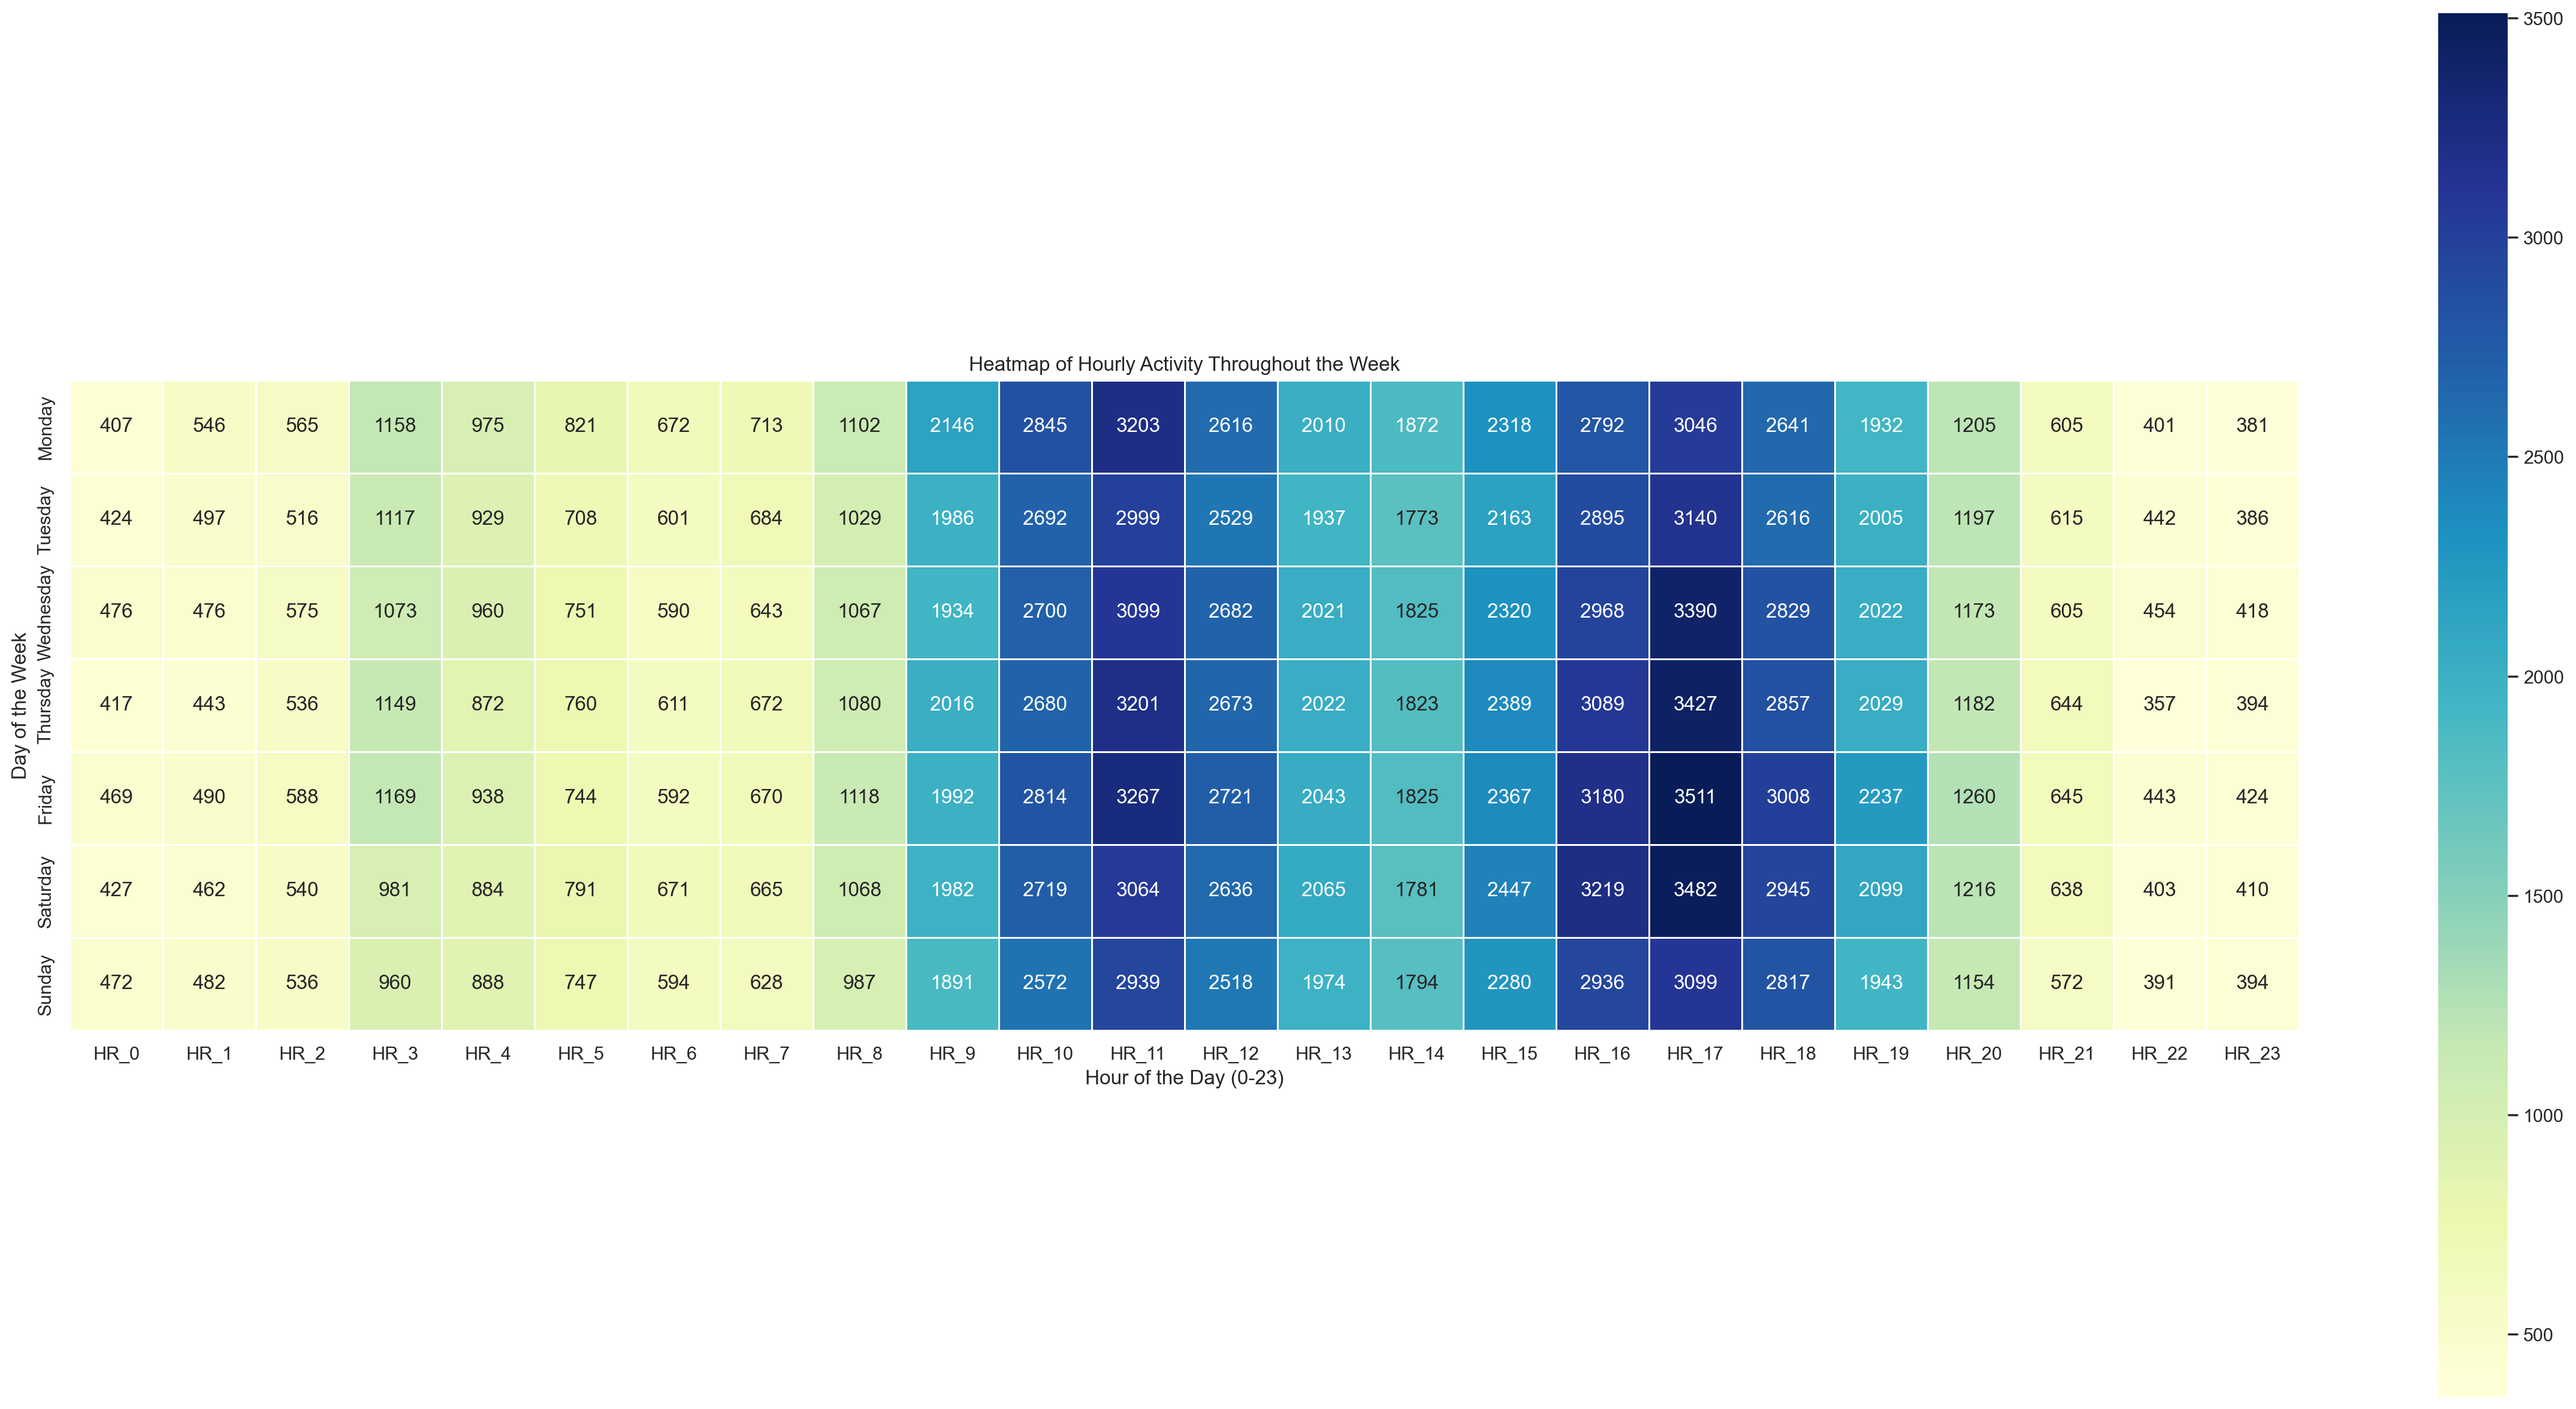

In [230]:
# Create an empty DataFrame to store the aggregated activity, initializing with zeros
heatmap_data = pd.DataFrame(index=dow_columns, columns=hr_columns)

# Sum of the hourly activity for each day and fill in the heatmap data
for day in dow_columns:
    # Summing the hourly columns for the current day and filling NaNs with zero
    heatmap_data.loc[day] = df.loc[df[day] == 1, hr_columns].sum().fillna(0)

# Convert all data to numeric (float)
heatmap_data = heatmap_data.astype(float)

# Plot the heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(heatmap_data, 
            cmap="YlGnBu", 
            linewidths=1, 
            annot=True, 
            square=True, 
            fmt='.0f')
plt.title('Heatmap of Hourly Activity Throughout the Week')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Day of the Week')
plt.show()


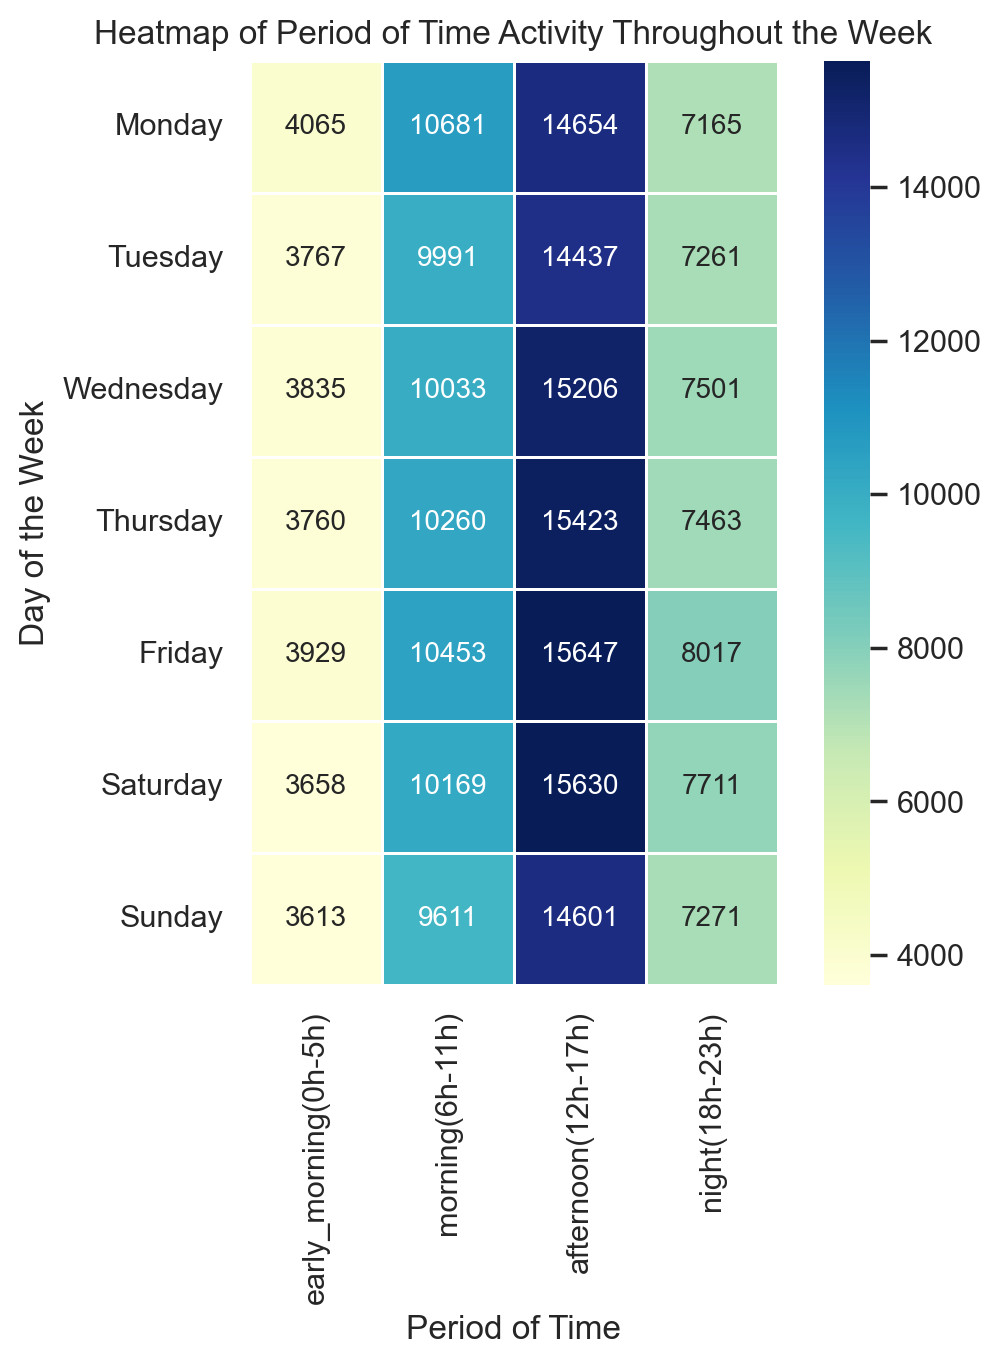

In [246]:
# Create an empty DataFrame to store the aggregated activity, initializing with zeros
heatmap_data = pd.DataFrame(index=dow_columns, columns=time_columns)

# Sum the hourly activity for each day and fill in the heatmap data
for day in dow_columns:
    # Summing the hourly columns for the current day and filling NaNs with zero
    heatmap_data.loc[day] = df.loc[df[day] == 1, time_columns].sum().fillna(0)

# Convert all data to numeric (float)
heatmap_data = heatmap_data.astype(float)

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, 
            cmap="YlGnBu", 
            linewidths=0.5, 
            annot=True, 
            square=True,
            annot_kws={'size': 10 }, 
            fmt='.0f')
plt.title('Heatmap of Period of Time Activity Throughout the Week')
plt.xlabel('Period of Time')
plt.ylabel('Day of the Week')
plt.show()

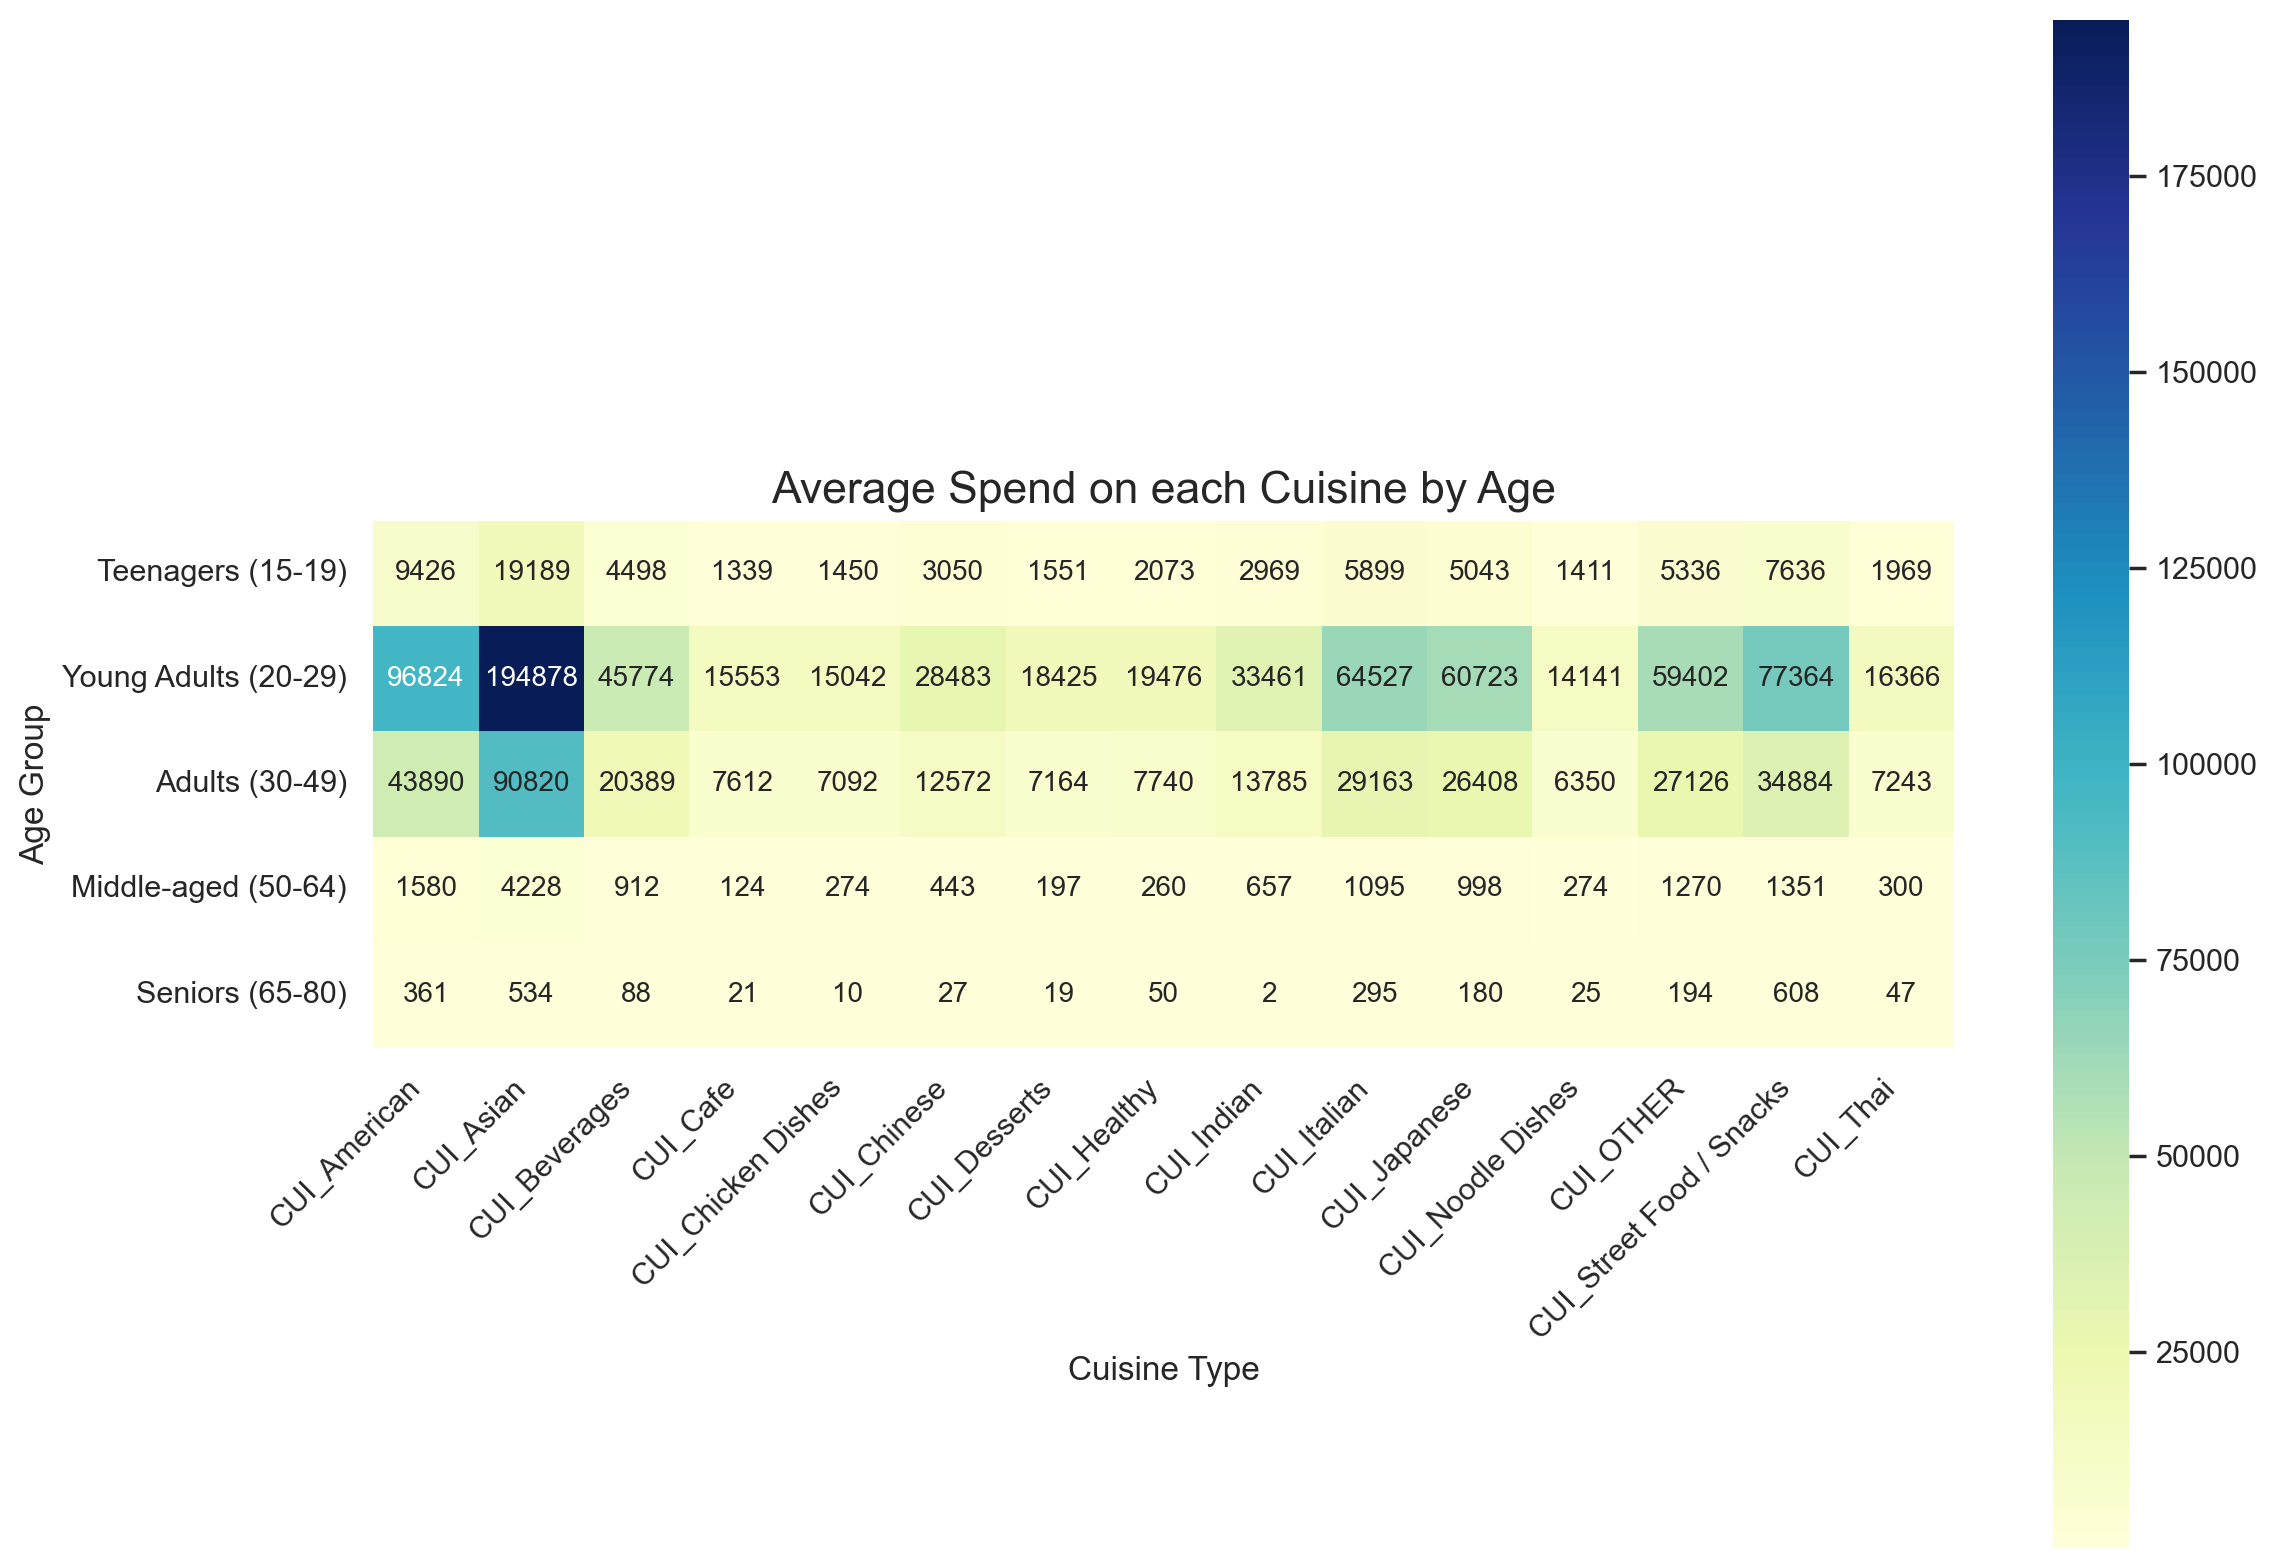

In [247]:
cuisine_by_age = df.groupby('age_group')[CUI_columns].sum()

plt.figure(figsize=(12, 8))
sns.heatmap(cuisine_by_age, 
            annot=True,
            annot_kws={'size': 10 }, 
            cmap="YlGnBu", 
            fmt='.0f', 
            square=True)

plt.title('Average Spend on each Cuisine by Age', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Age Group', fontsize=12)


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


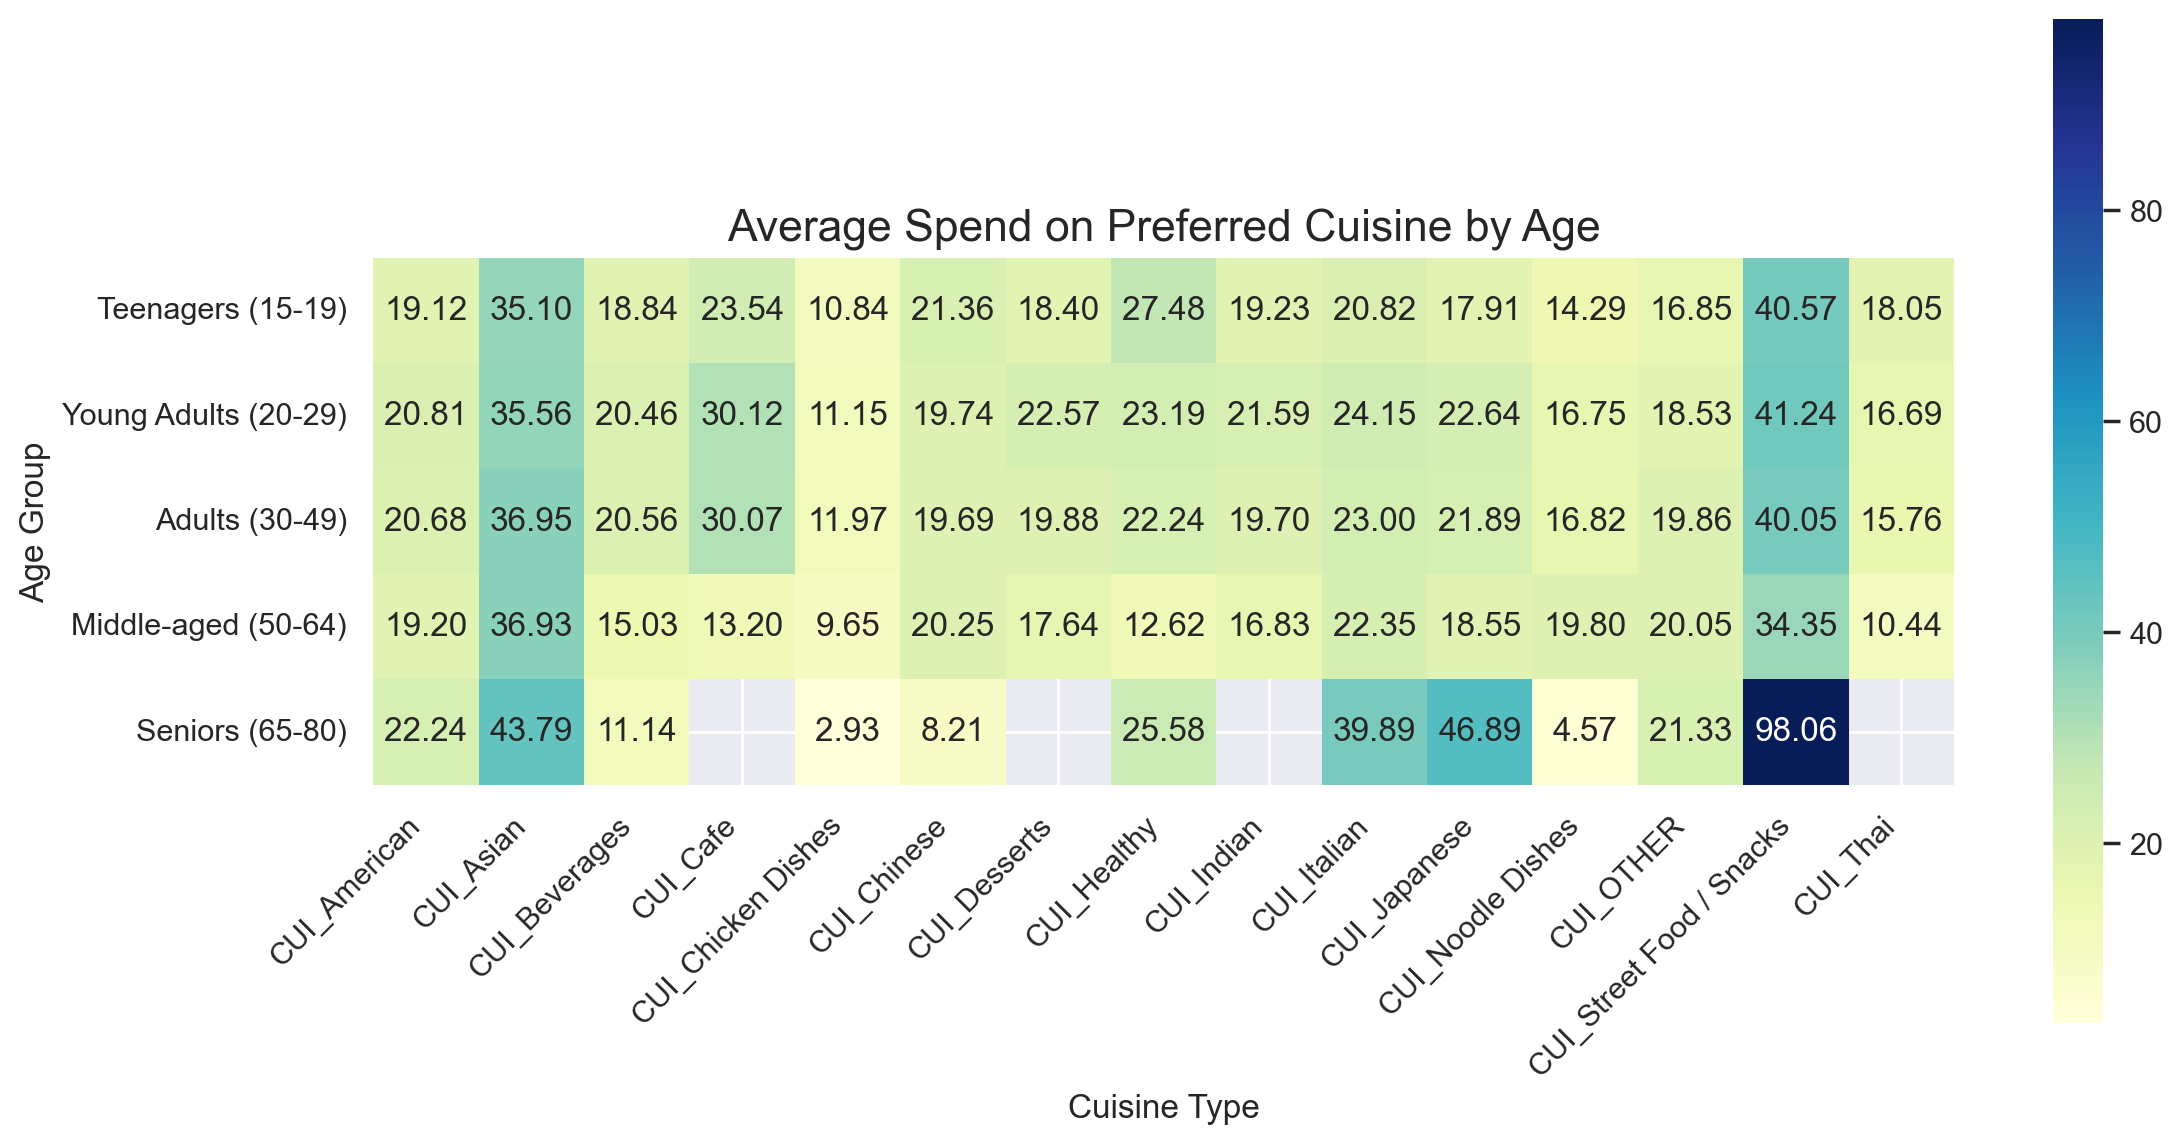

In [252]:
df['preferred_spend'] = df.apply(lambda row: row[row['preferred_cuisine']] if row['preferred_cuisine'] in CUI_columns else 0, axis=1)

cuisine_pivot = df.pivot_table(index='age_group', columns='preferred_cuisine', values='preferred_spend', aggfunc='mean', observed=False)


plt.figure(figsize=(12,6))
sns.heatmap(cuisine_pivot, annot=True, 
            cmap='YlGnBu', 
            fmt='.2f', 
            square=True)


plt.title('Average Spend on Preferred Cuisine by Age', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Age Group', fontsize=12)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

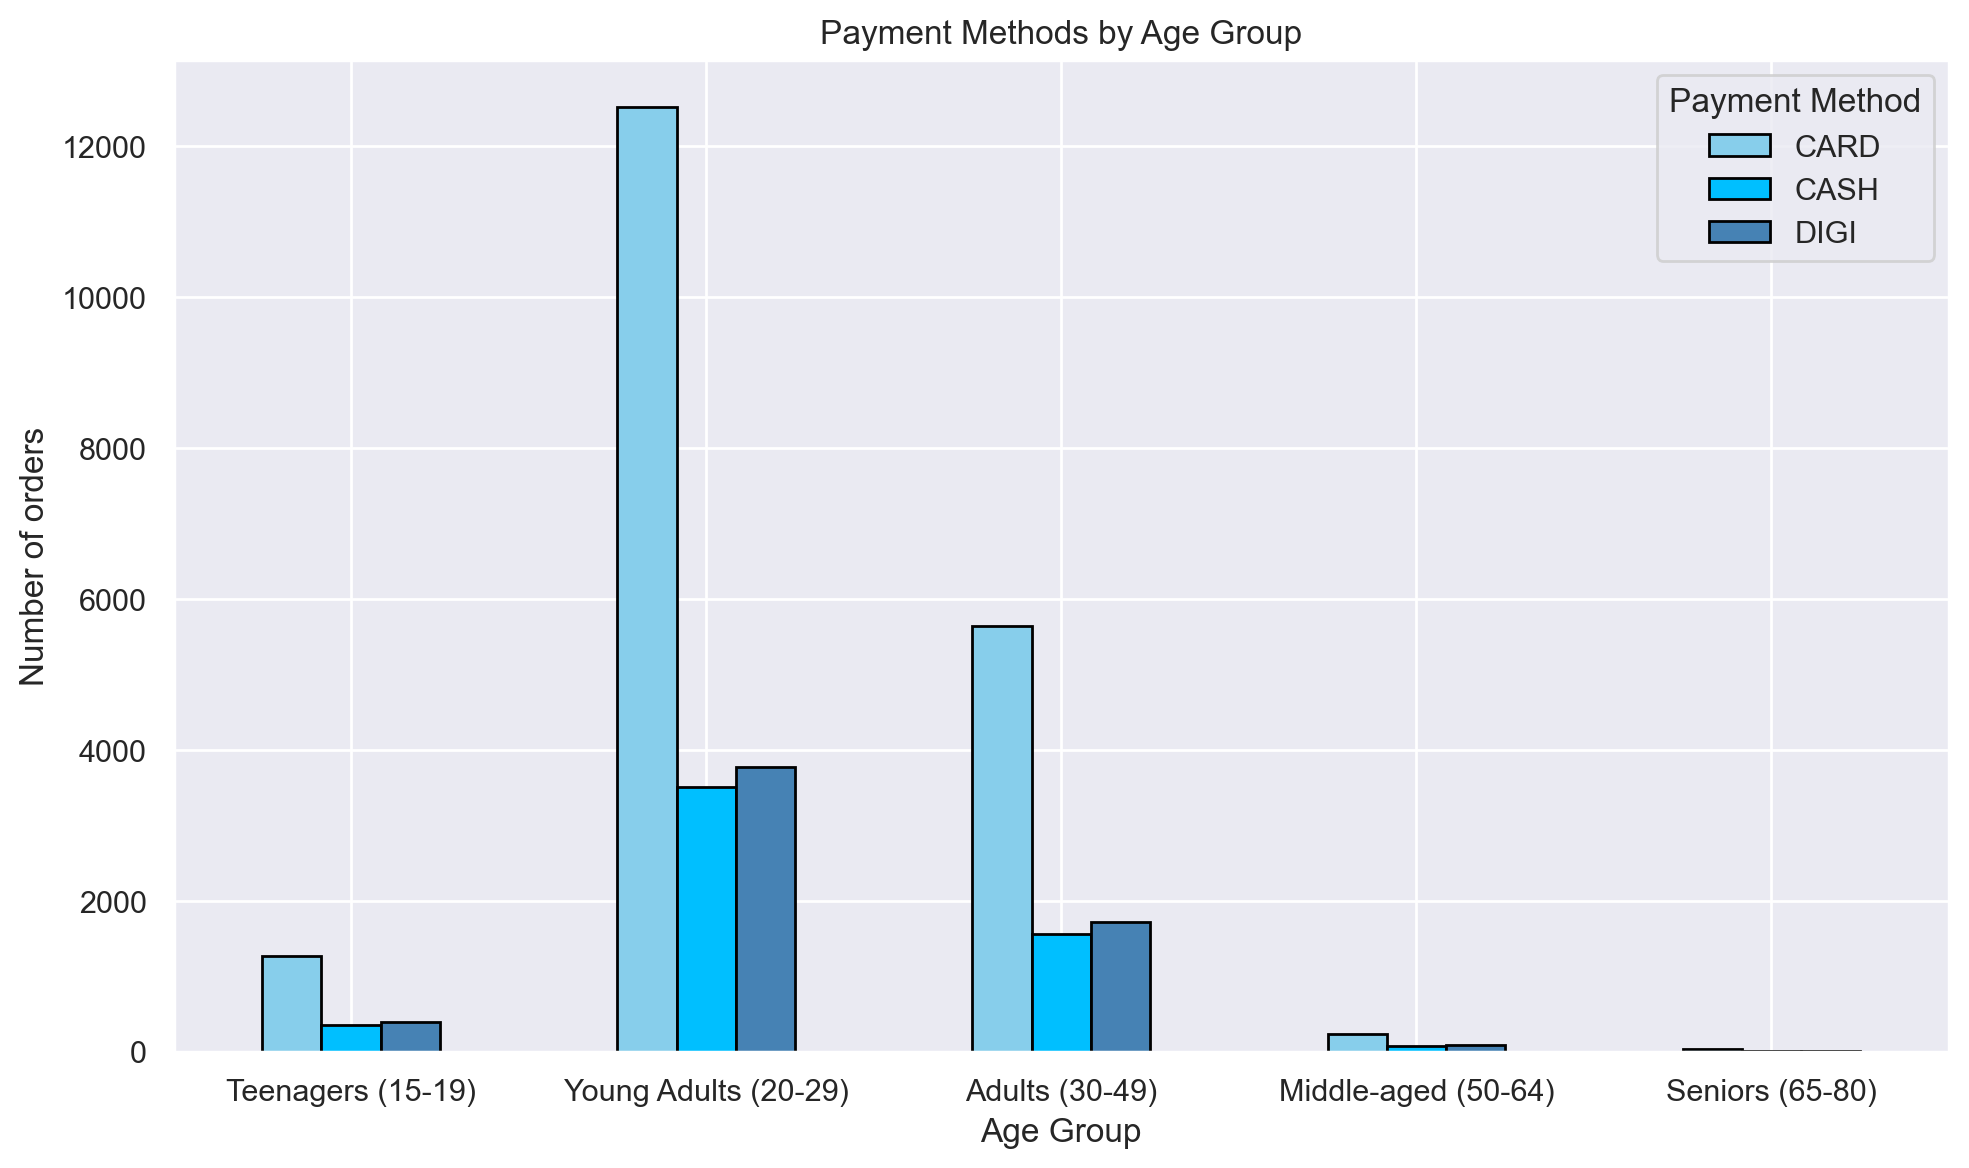

In [235]:
payment_counts = df.groupby(['age_group', 'payment_method']).size().unstack(fill_value=0)

colors=['#87CEEB','#00BFFF','#4682B4']
payment_counts.plot(kind='bar', 
                    stacked=False, 
                    figsize=(10, 6), 
                    color=colors, 
                    edgecolor='black') #Stack or no??

plt.title('Payment Methods by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of orders')
plt.xticks(rotation=0)  
plt.legend(title='Payment Method')
plt.tight_layout()  
plt.show()

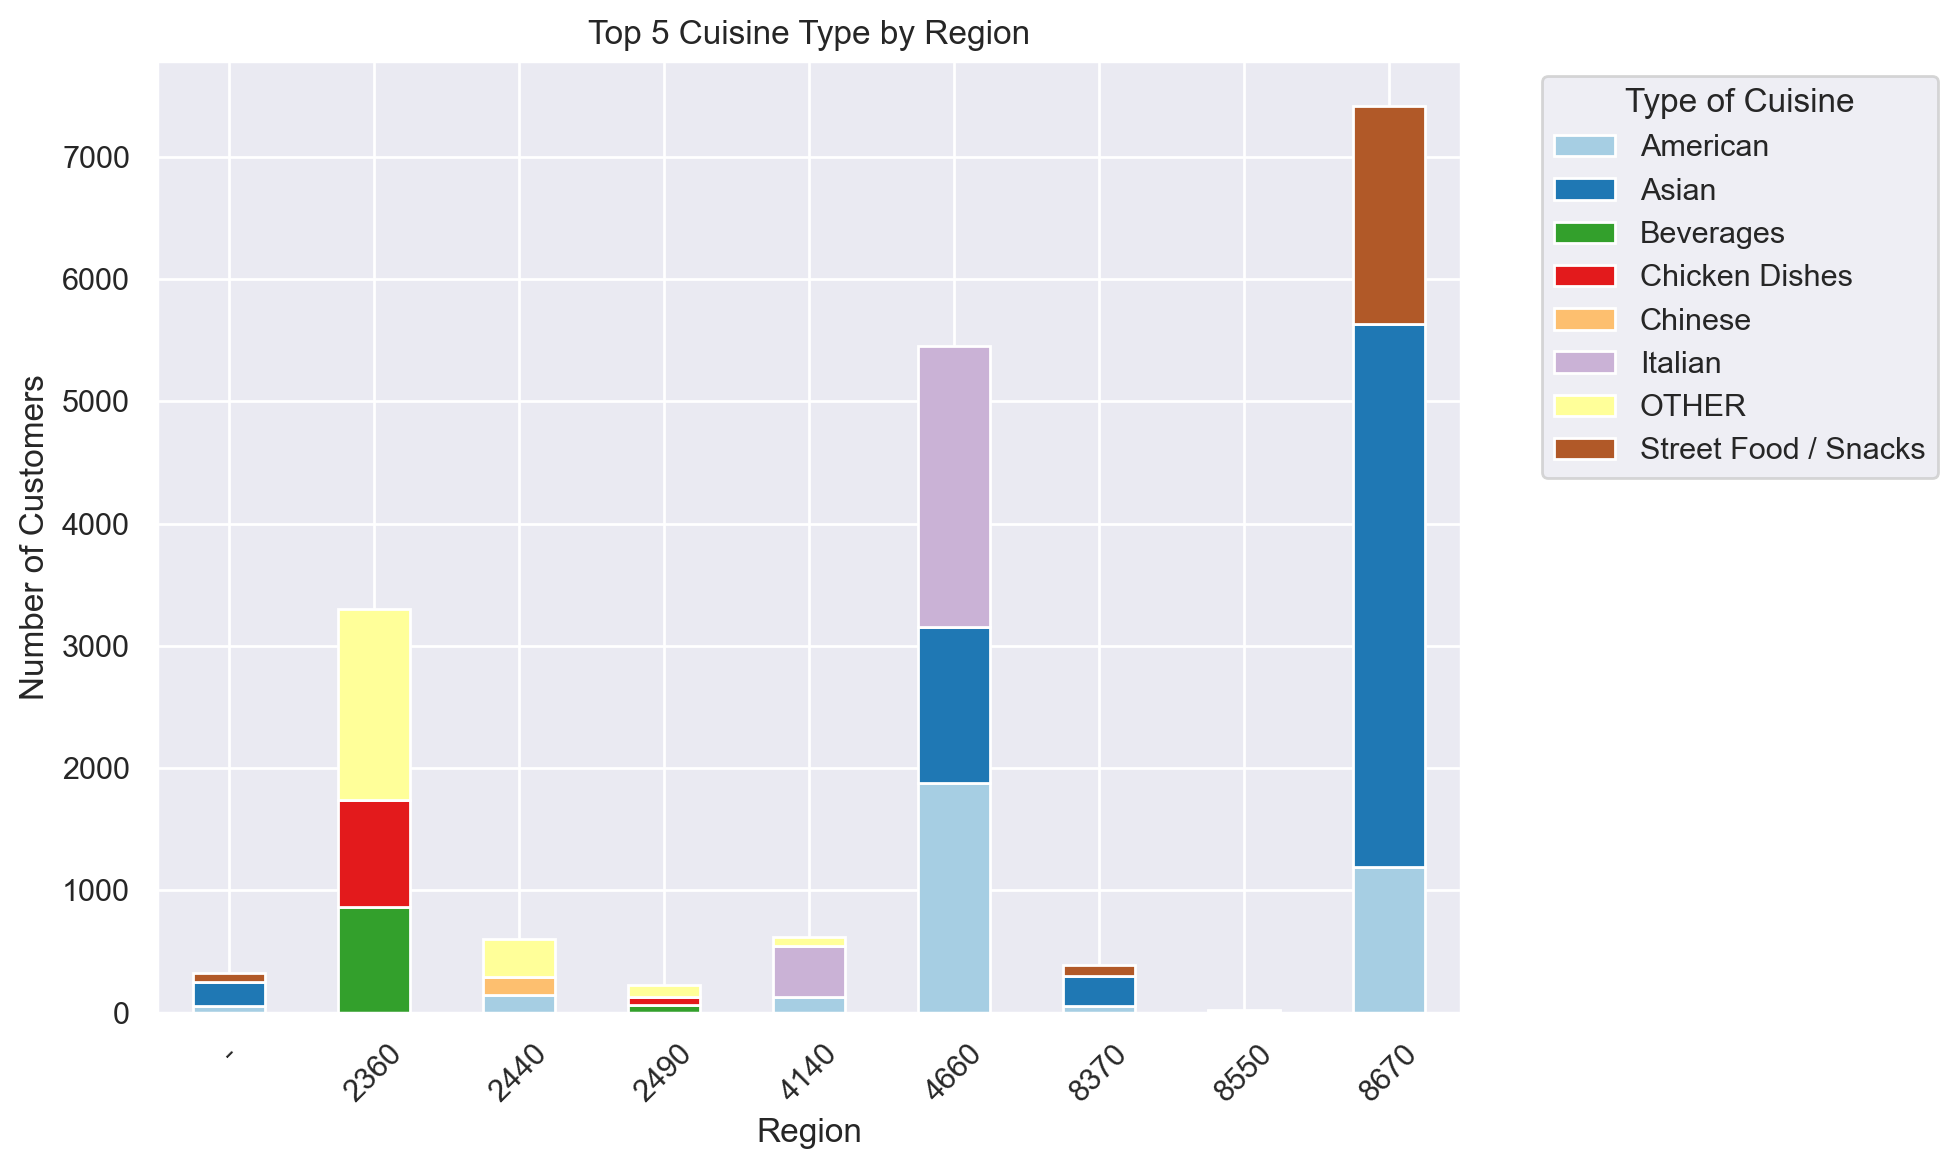

In [237]:
#FALTA COMENTAR!!!
cuisine_counts = df.groupby(['customer_region', 'preferred_cuisine']).size().reset_index(name='count')

top_cuisines = (
    cuisine_counts.groupby('customer_region')
    .apply(lambda x: x.nlargest(3, 'count'))
    .reset_index(drop=True)
)


top_cuisine_counts = top_cuisines.pivot(index='customer_region', columns='preferred_cuisine', values='count').fillna(0)


num_cuisines = top_cuisine_counts.shape[1]  
colors = plt.cm.Paired(np.linspace(0, 1, num_cuisines))  


top_cuisine_counts.plot(kind='bar', 
                        stacked=True, 
                        figsize=(10, 6), 
                        color=colors)


plt.title('Top 5 Cuisine Type by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  
plt.legend(title='Type of Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()


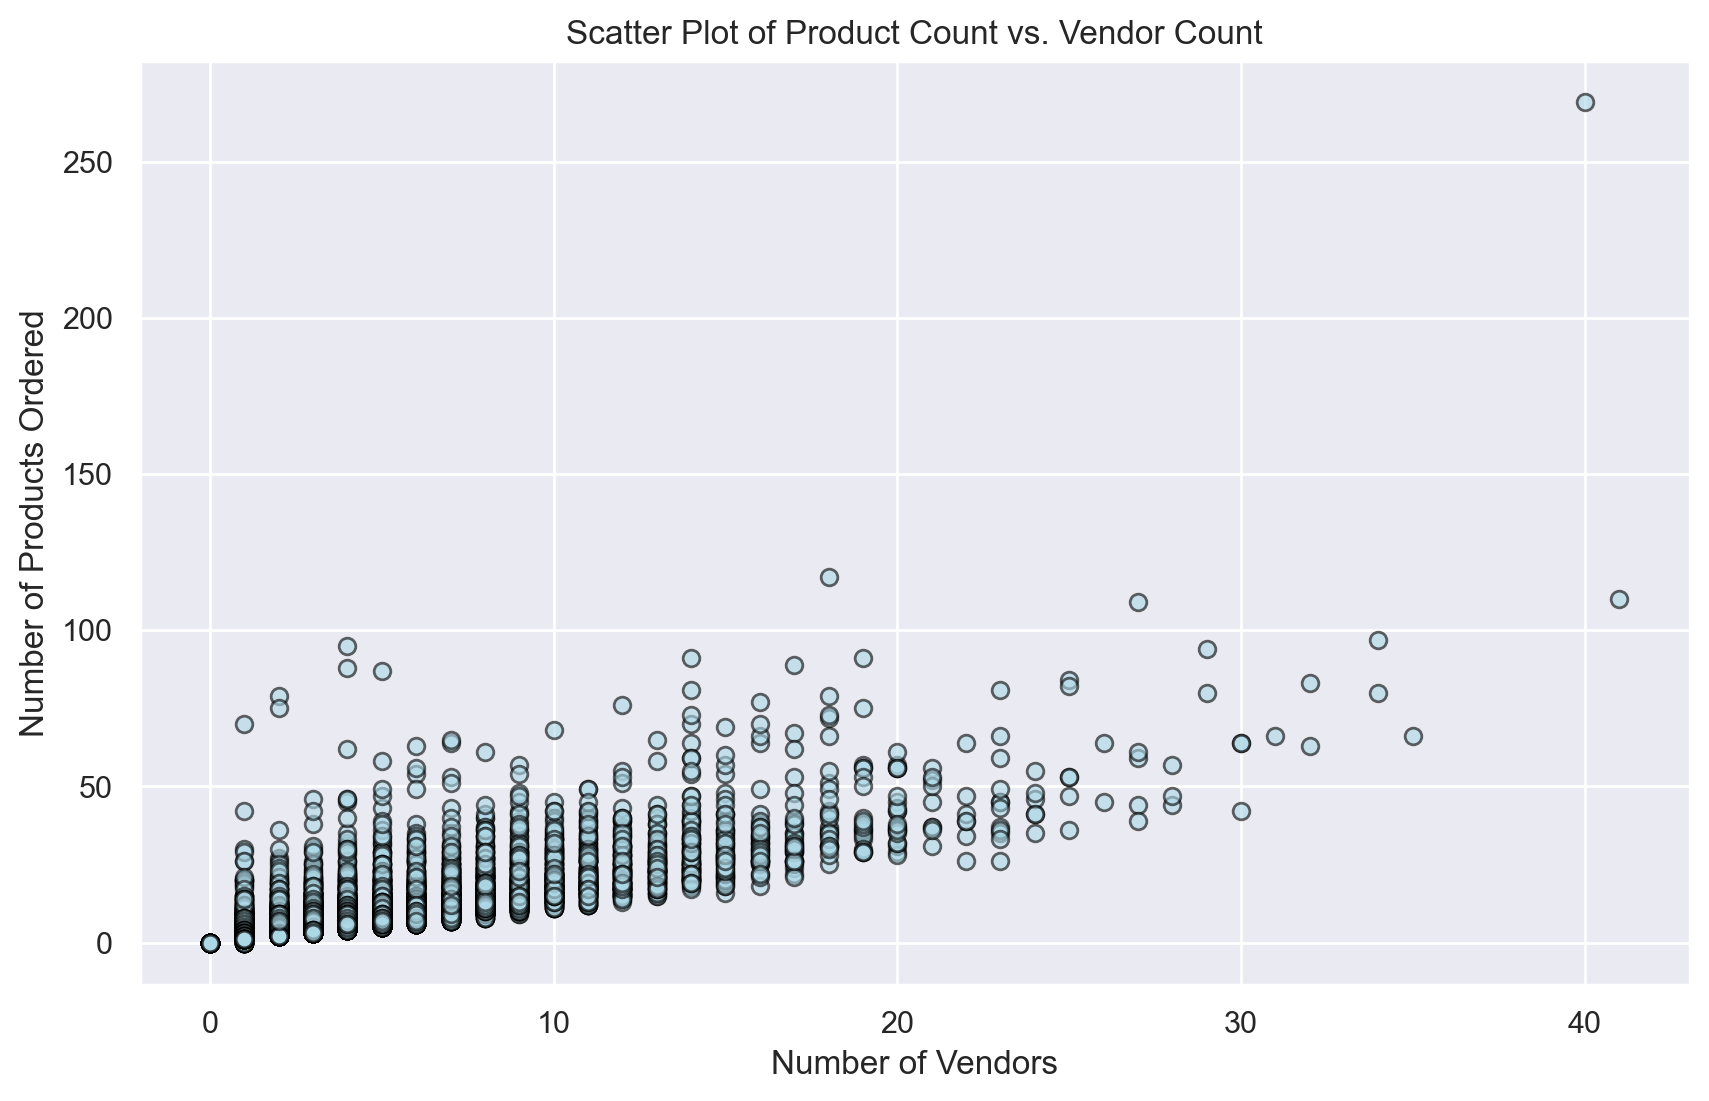

In [254]:
x = df['vendor_count']  # Number of vendors
y = df['product_count']  # Number of products ordered

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6,
            color='lightblue', 
            edgecolor='black')

plt.title('Scatter Plot of Product Count vs. Vendor Count')
plt.xlabel('Number of Vendors')
plt.ylabel('Number of Products Ordered')
plt.grid(True)
plt.show()

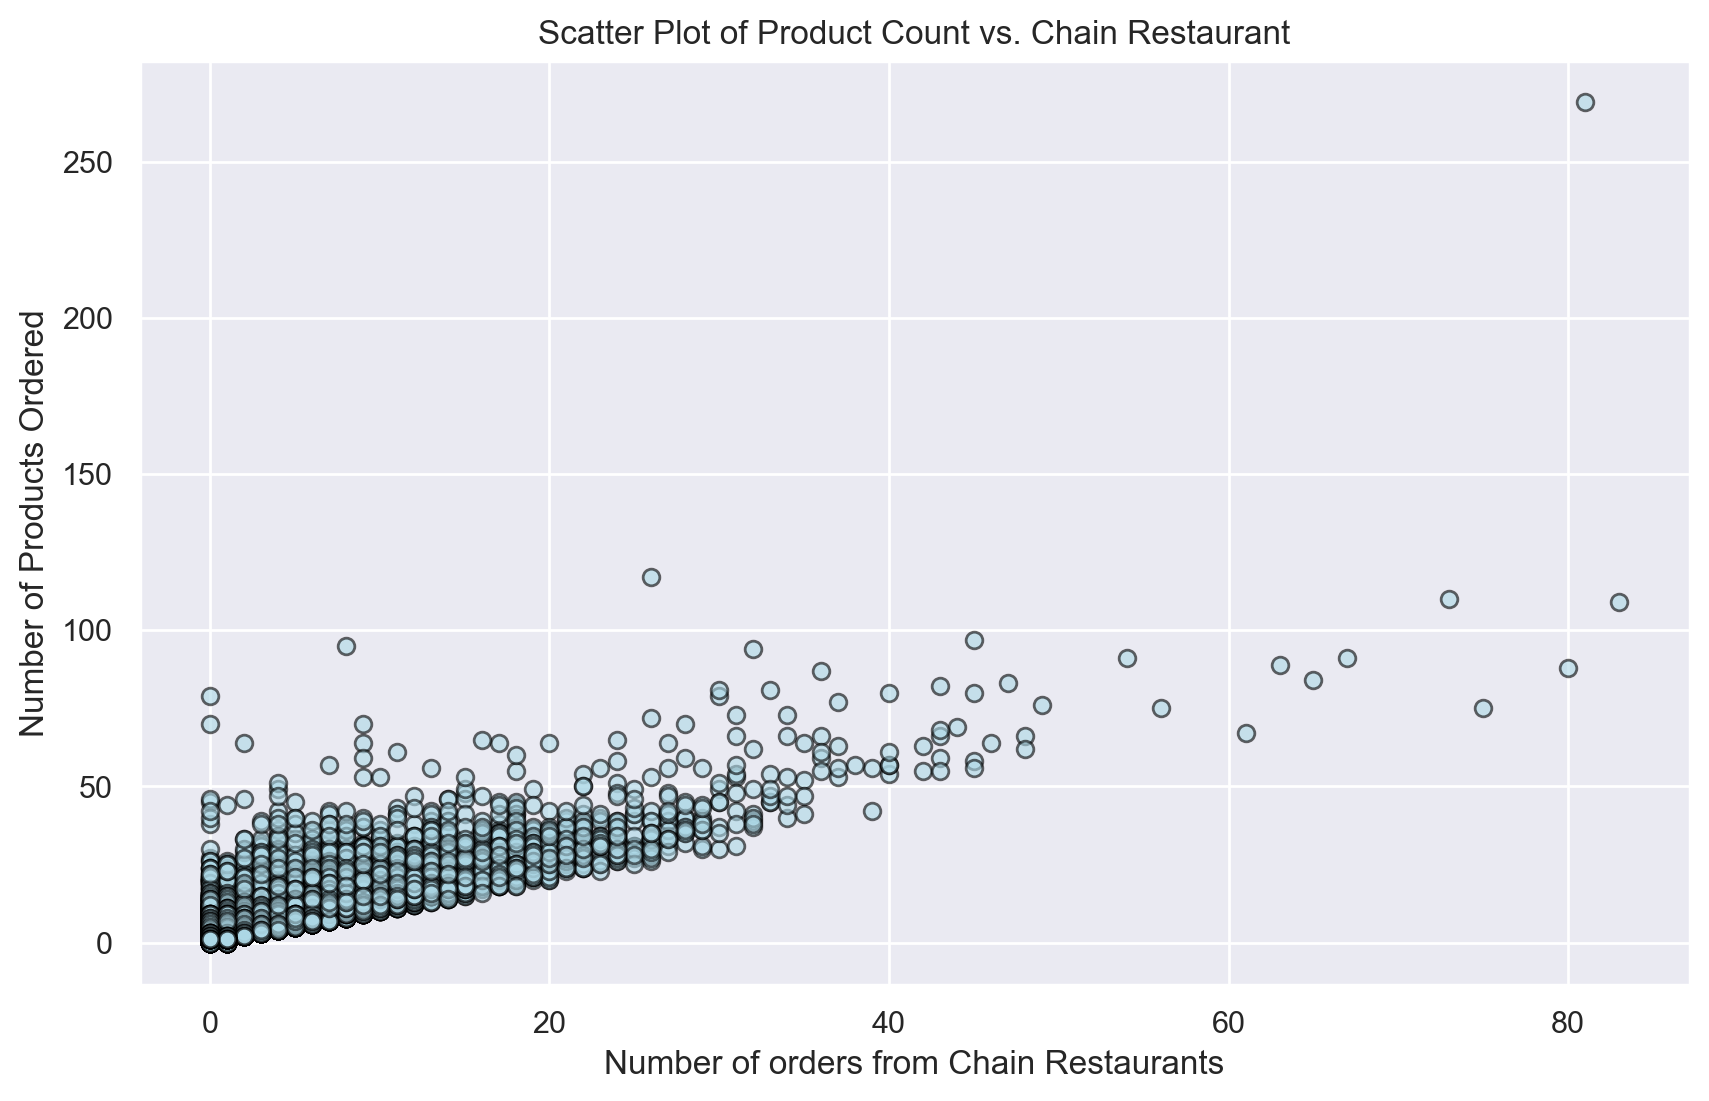

In [239]:
# Not to consider
x = df['is_chain'] 
y = df['product_count']  

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color='lightblue', edgecolor='black')

plt.title('Scatter Plot of Product Count vs. Chain Restaurant')
plt.xlabel('Number of orders from Chain Restaurants')
plt.ylabel('Number of Products Ordered')
plt.grid(True)
plt.show()

In [240]:
#See the max of the columns first_order = how long ago is the first order
max_first_order=df['first_order'].max()
max_first_order

90.0

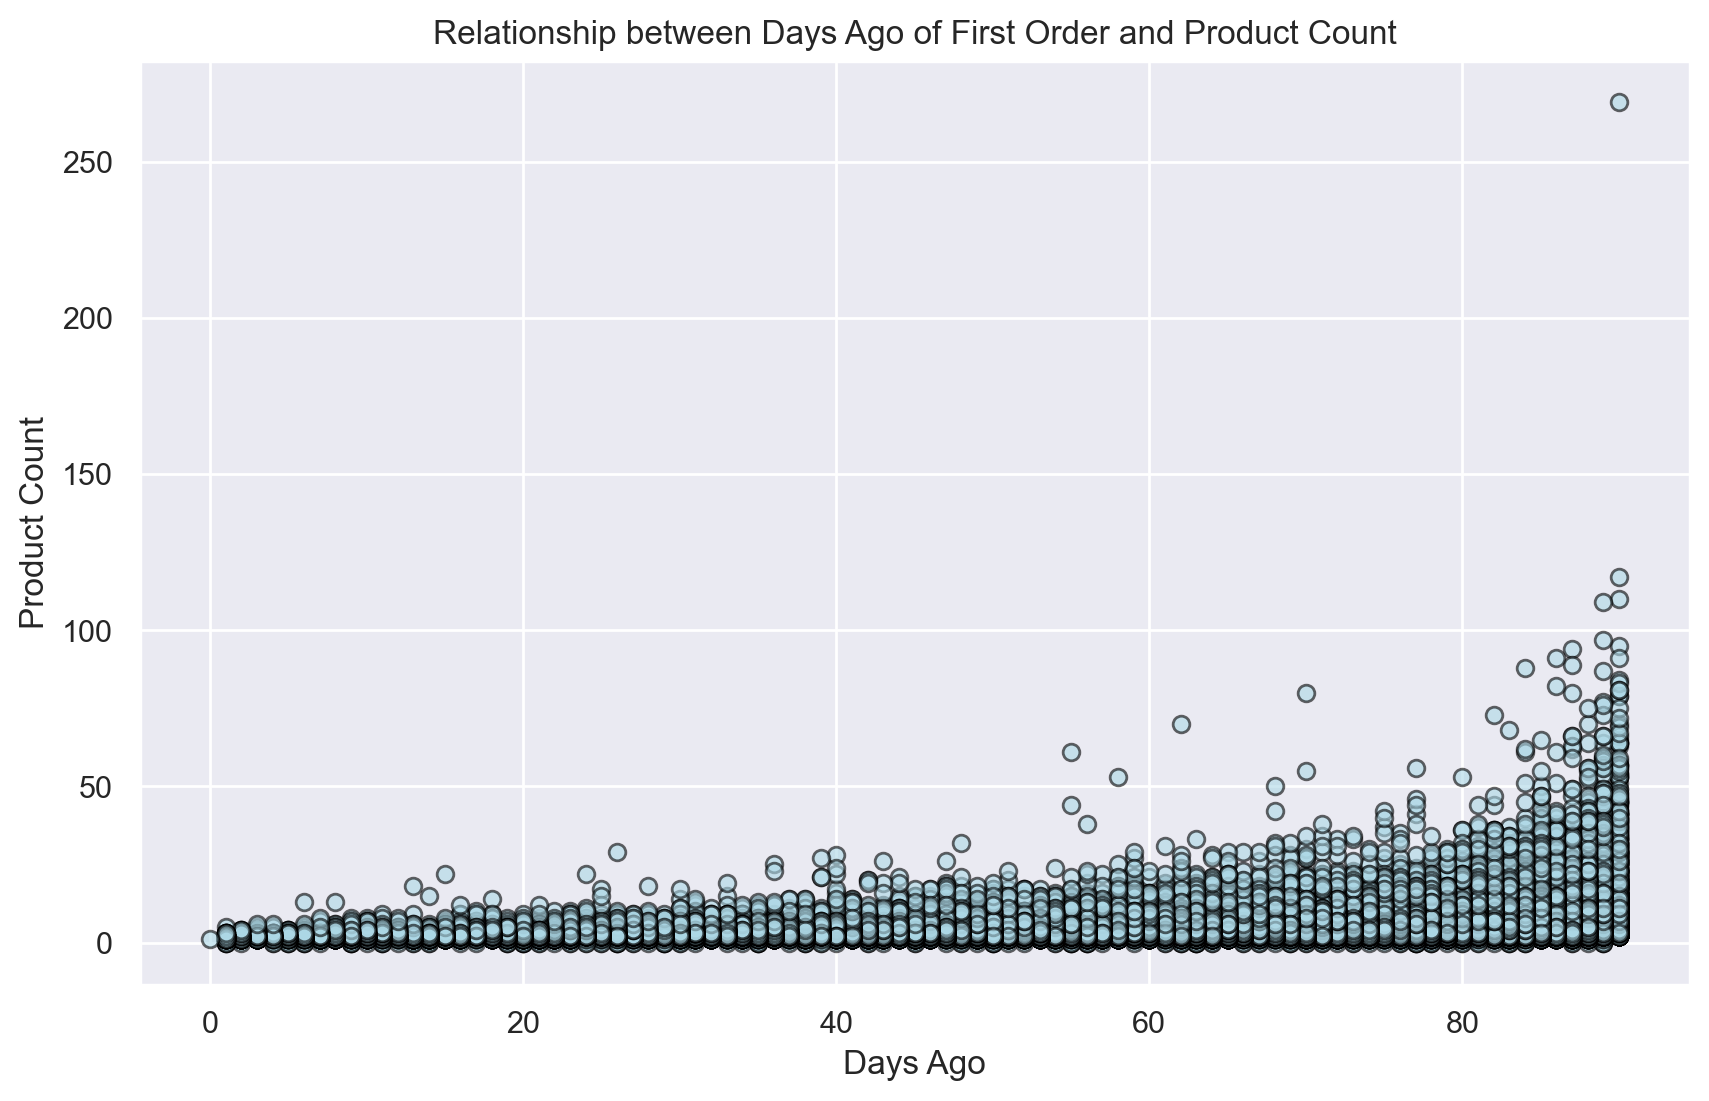

In [241]:
x = max_first_order -df['first_order']  #Make it more readable
y = df['product_count']  

plt.figure(figsize=(10, 6))
plt.scatter(x,y, alpha=0.6, 
            color='lightblue',
            edgecolor='black')
plt.xlabel('Days Ago')
plt.ylabel('Product Count')
plt.title('Relationship between Days Ago of First Order and Product Count')
plt.grid(True)
plt.show()

In [255]:
# Group by customer_region and customer_age
grouped = df.groupby(['customer_region', 'customer_age'])['sum_of_orders'].sum().reset_index()

# Sort the results
grouped = grouped.sort_values(['customer_region', 'customer_age'])

In [256]:
regional_stats = grouped.groupby('customer_region').agg({
    'customer_age': ['mean', 'min', 'max'],
    'sum_of_orders': ['mean', 'min', 'max', 'sum']
}).reset_index()

print(regional_stats)


  customer_region customer_age             sum_of_orders                 
                          mean   min   max          mean min   max    sum
0               -    34.314286  17.0  55.0     42.685714   1   137   1494
1            2360    45.050000  15.0  79.0    745.650000   1  3723  44739
2            2440    38.446809  15.0  72.0    151.489362   1   614   7120
3            2490    33.805556  16.0  56.0     55.388889   1   171   1994
4            4140    36.195122  16.0  58.0     65.243902   1   249   2675
5            4660    44.220339  15.0  80.0    726.338983   1  3420  42854
6            8370    34.974359  15.0  68.0     32.410256   1   119   1264
7            8550    24.700000  18.0  31.0     10.000000   2    32    100
8            8670    46.396825  15.0  80.0    535.761905   1  2750  33753


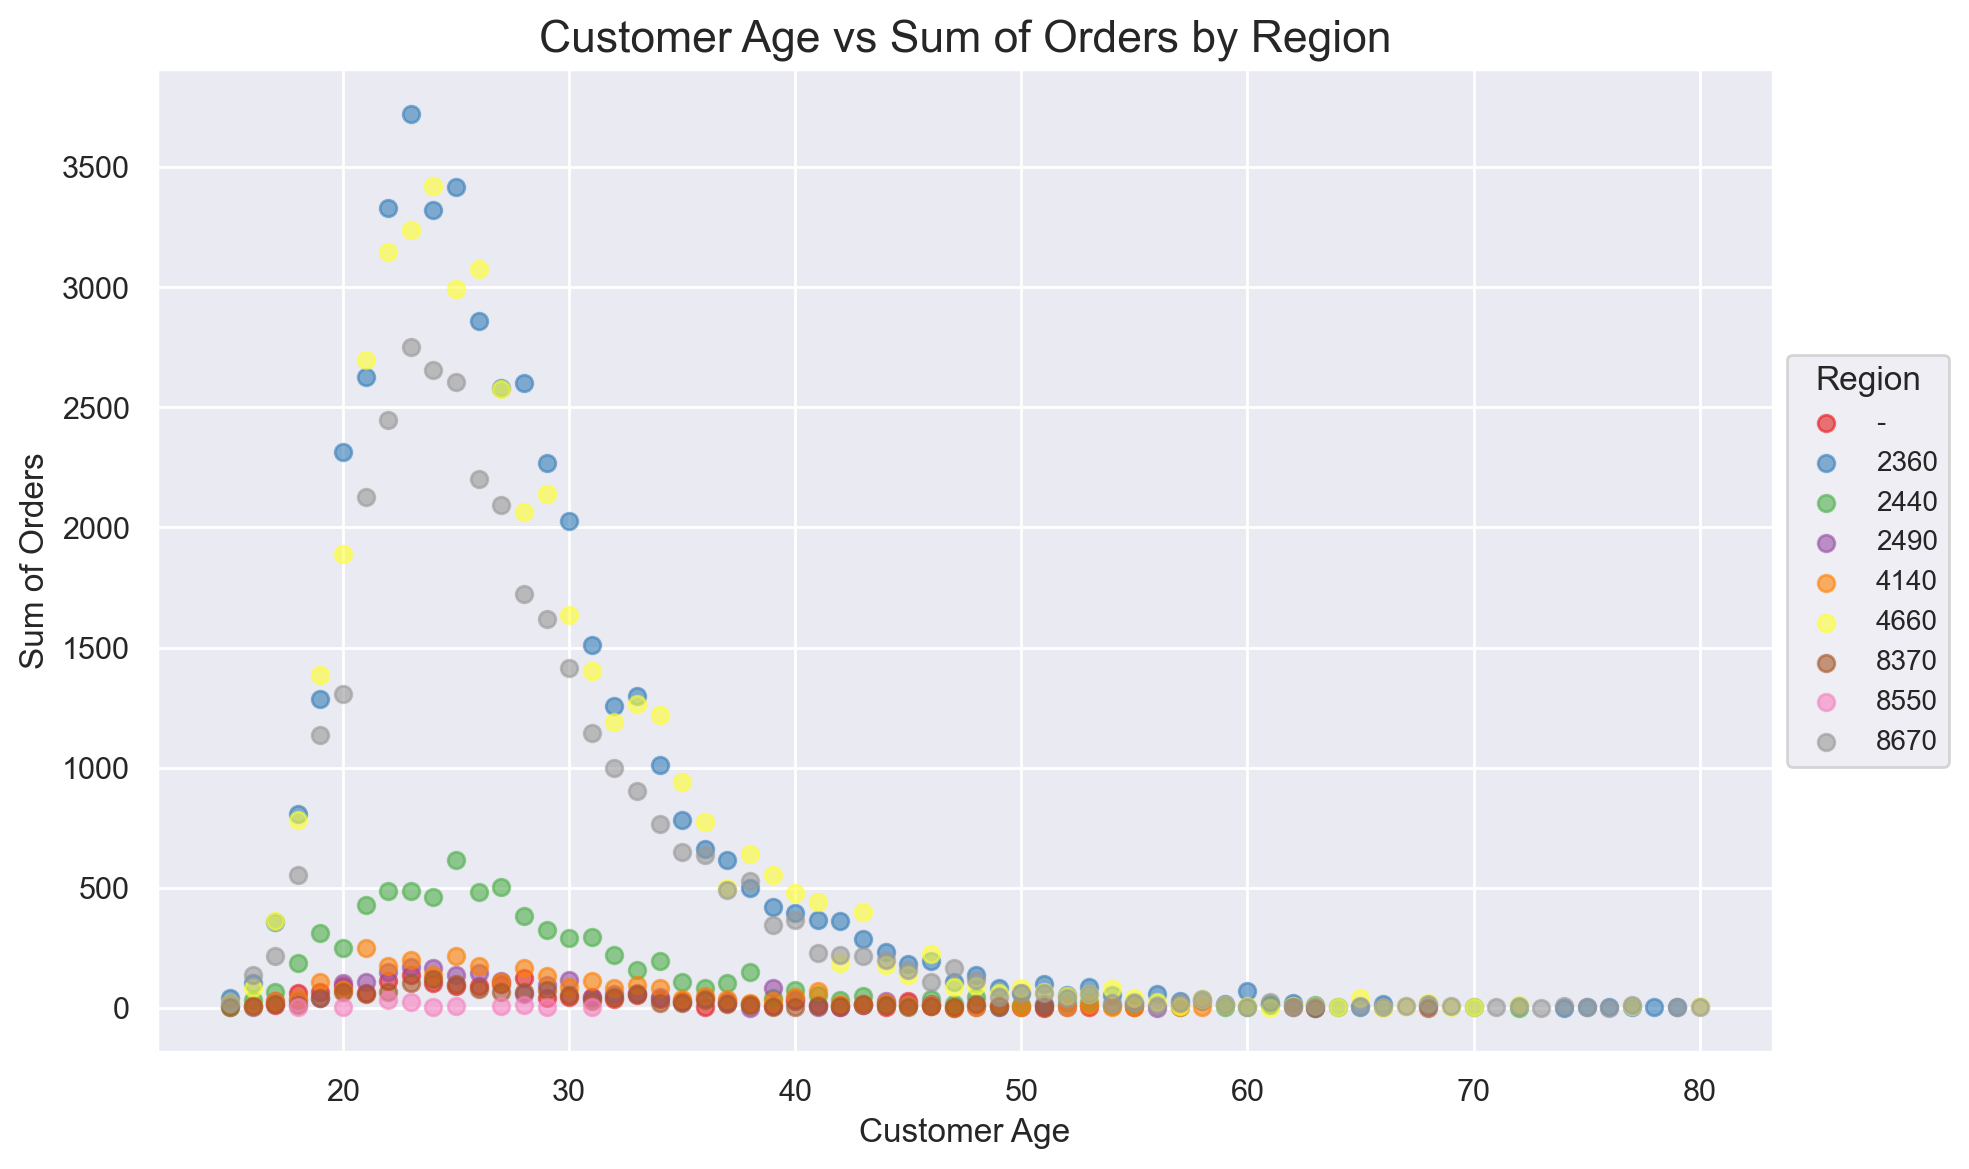

In [244]:
# FALTA COMENTAR!!

# Create a high-contrast color palette
num_regions = len(grouped['customer_region'].unique())
base_colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, num_regions))
custom_colors = ['#FF1493', '#00FFFF', '#FFD700', '#32CD32', '#FF4500', '#8A2BE2', '#00CED1']
color_palette = list(base_colors) + custom_colors

plt.figure(figsize=(10, 6))

for i, region in enumerate(grouped['customer_region'].unique()):
    region_data = grouped[grouped['customer_region'] == region]
    plt.scatter(region_data['customer_age'], region_data['sum_of_orders'], 
                label=region, alpha=0.6, color=color_palette[i])

plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Sum of Orders', fontsize=12)
plt.title('Customer Age vs Sum of Orders by Region', fontsize=16)
plt.legend(title='Region', title_fontsize='12', fontsize='10', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()